# Welcome to the AMIDR/AMID Analysis Notebook!

This notebook allows easy analysis of AMIDR/AMID data (from Dal and Novonix UHPC files or BioLogic files converted into UHPC format) with flexibility for naming files and creating directories.

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls. Below are two universal arguments for every function call.

>**export_data**: Whether or not to save the processed data as a datatable or a series of datatables. <br> *Default is True*

>**export_fig**: Whether or not to save the resulting figures. <br> *Default is True*

To run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

## BioLogic Pre-processing (Ignore if UHPC)

Exported BioLogic files must first be pre-processed to generate UHPC format files capable of being read by AMIDR. Please ignore this section if testing was done using Dal or Novonix UHPC cell testers. Check the second plot to ensure that there is strong OCV agreement between charge and discharge. Poor agreement suggests substantial side reactions which will introduce error to the measured diffusivity values. 

>**cellpath**: The location on your computer where the BioLogic files are located and where the UHPC format files will be placed. It is recommended that this folder is dedicated to a single cell so it can be used again in further analysis. It is also recommended that all cellpath folders are located within one larger folder to better enable cell to cell comparison. Following this file structure will allow you to never have to manually move files. Use the "/", not the "\\", for separating directories.

>**formfiles/dfiles/cfiles**: The names of the formation, discharge, and charge BioLogic files. Be sure to list them in chronological order and include the .mpt file extension.

>**cellname**: The name of the cell being measured. It's recommended to include information such as material and temperature.

All files get saved in the directory *cellpath*.

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Form.csv
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Protocol.jpg


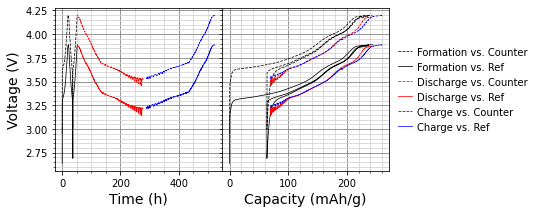

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C OCV Match.jpg


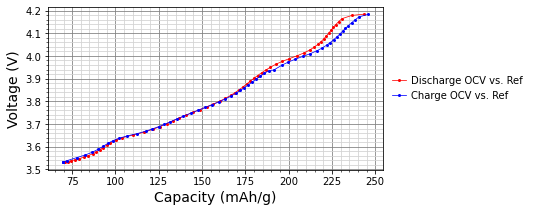

In [17]:
cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/270'
formfiles = ['270_230530_C02.mpt']
dfiles = ['270_230602_D4,2-3,95V_C02.mpt', '270_230604_D3,95-3,7V_C02.mpt', '270_230606_D3,7-3,45V_C02.mpt']
cfiles = ['270_230612_C3,5-3,7V_C02.mpt', '270_230619_C3,7-3,95V_C02.mpt', '270_230623_C3,95-4,2V_C02.mpt']
cellname = '270 NM9505 30C'

from amidr import BIOCONVERT
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

## The AMIDR/AMID Object

#### [Optional Arguments (Advanced)](#The-AMIDR/AMID-Object:)

Instantiating the AMIDR/AMID object is easy! The resulting object (in this case *amidr_data*) will contain parsed data from the AMIDR/AMID dataset. You should read the output to be sure it is giving the information you expect.

>**cellpath**: The location on your computer where the UHPC format AMIDR/AMID file is located and where the analysis files will be placed. It is recommended that this folder is dedicated to a single cell so it can be used again in further analysis. It is also recommended that all cellpath folders are located within one larger folder to better enable cell to cell comparison. Following this file structure will allow you to never have to manually move files. Use the "/", not the "\\", for separating directories.

>**uhpc_file**: The name of the AMIDR/AMID UHPC file to analyze. If BioLogic pre-processing was done, this is the charge or discharge file that was outputted by that. All analysis of this file will be labeled with and sent into a new subfolder of this file name. It is strongly recommended that the file name end with "Discharge.csv" or "Charge.csv". This will allow you to average the resulting analysis with other analyses of cells of the same material. If BioLogic pre-processing was done this has already been done automatically.

>**single_pulse**: Whether the data file being read comes from an AMIDR *(True)* or AMID *(False)* protocol. Parsing will fail if not selected correctly.

> **parselabel**: An additional label to append to the *uhpc_file* label on the figures and exported file names. This can be helpful for comparing different parsing settings upon the same dataset. Changing the label allows for the fitting to generate files to a new directory without overwriting the last parses. <br> *Default is None*

All files get saved in the directory *cellpath/uhpc_file*.

In [18]:
cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/270'
uhpc_file = '270 NM9505 30C Discharge.csv'

from amidr import AMIDR
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)

270 NM9505 30C Discharge
Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.000485 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 177
Starting voltage: 4.184 V
Ending voltage: 3.455 V
Found 59 charge or discharge steps in signature curve sequences.
Found 59 signature curves.
Voltage interval labels: ['4.184 V - 4.178 V', '4.178 V - 4.164 V', '4.164 V - 4.151 V', '4.151 V - 4.138 V', '4.138 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.088 V', '4.088 V - 4.076 V', '4.076 V - 4.063 V', '4.063 V - 4.051 V', '4.051 V - 4.038 V', '4.038 V - 4.026 V', '4.026 V - 4.013 V', '4.013 V - 4.001 V', '4.001 V - 3.988 V', '3.988 V - 3.976 V', '3.976 V - 3.963 V', '3.963 V - 3.951 V', '3.951 V - 3.938 V', '3.938 V - 3.926 V', '3.926 V - 3.913 V', '3.913 V - 3.901 V', '3.901 V - 3.888 V', '3.888 V - 3.876 V', '3

## Pre-fitting Plots

Now that the data is parsed and evaluated the standard plots can be produced. plot_protocol plots the entire protocol being analyzed. plot_caps plots pulses/intervals individually. The plots should be examined to ensure your test data is being parsed and evaluated correctly.

All files get saved in the directory *cellpath/uhpc_file*.

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge\270 NM9505 30C Discharge Protocol.jpg


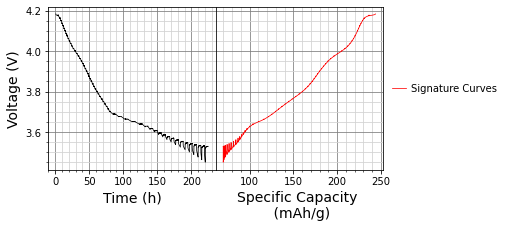

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge\270 NM9505 30C Discharge Parsed.jpg


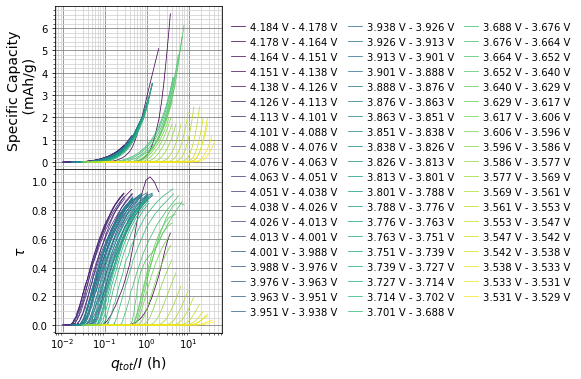

In [12]:
amidr_data.plot_protocol()
amidr_data.plot_caps()

## Data Fitting 

#### [Optional Arguments (Advanced)](#Data-Fitting:)

If your data has been correctly parsed, it is now time to fit it to calculate diffusivity (and potentially resistance). Take care when selecting your arguments as this step can take some time.

> **radius**: The particle radius in cm. It is recommended to calculate this by measuring individual particles in SEM images and then take the mass-weighted geometric mean.

> **R_corr**: Whether the data is being fit to an AMIDR *(True)* or AMID *(False)* model. AMIDR's model includes resistance as a source of impedance and will return both diffusivity and resistance values. AMID data can be fit to the AMIDR model, but this is not recommended as this will amplify systematic error in AMID's multi-rate protocol. AMIDR data can also be fit to AMID's model but this is not recommended as this allows resistance to be falsely measured as diffusivity.

> **ionsat_inputs**: A list of optional inputs to calculate ion saturation and $D_t^*$. If left empty, ion saturation and $D_t^*$ will simply not be calculated. The six inputs are: <br> 
\- The temperature in K <br>
\- The theoretical max specific capacity in mAh/g of a completely saturated and desaturated active material<br> 
\- The voltage in V of an arbitrary point 1 in a half cell with regular mass loading <br> 
\- The specific capacity in mAh/g of an arbitrary point 1 in a half cell with regular mass loading <br> 
\- The voltage in V of an arbitrary point 2 in a half cell with regular mass loading <br> 
\- The specific capacity in mAh/g of an arbitrary point 2 in a half cell with regular mass loading <br>
Ideally, the specific capacities of the cell being tested could be used to calculate ion saturation. However, it is very difficult to accurately measure the amount of active mass for electrodes with very low mass loadings. This means the specific capacity of each fit is innaccurate producing error in ion saturation and $D_t^*$. To compensate for this, the cell's specific capacities can be adjusted to match its voltages which are accurately measured. This is done with 2 datapoints from a regular mass loading half cell with accurately measured specific capacity and voltage. It's recommended that these two datapoints are far apart and are determined as the average of a charge datapoint and a discharge datapoint that are not located on a plateau or cliff edge. <br> *e.g., tracer_inputs = \[303, 275, 3.7, 66, 4.1, 171\]* <br> *Default is \[\]*

> **micR_input**: The density of the active material in g/cm^3. This is necessary to calculate $ρ_{s}$, the interface contact resistivity (Ωcm^2). This value is normalized by the surface area of the active material so that it is inherent to the material and not dependent on the mass loading. If it is believed that the primary source of the resistance is the interface resistance, this value will be calculated accurately. Regardless, it is expressed as the "maximum" $ρ_{s}$ because a portion of it, no matter how small, will be from other sources. Error in the active mass and density values will contribute a proportional error in the calculated interface contact resistivity. However, because interface contact resistivity often changes drastically on a logarithmic scale, this error can be mostly ignored. <br> *Default is 4.9*

> **fitlabel**: An additional label to append to the *uhpc_file* label on the figures and exported file names. This can be helpful for comparing different fitting settings upon the same dataset. Changing the label allows for the fitting to generate files to same directory without overwriting the last fits. This is separate from the parse label. <br> *Default is None*

All files get saved in the directory *cellpath/uhpc_file*. 

Figures comparing theory to fitted values for each pulse/interval will not be previewed in this notebook because too many figures would be shown.

In [20]:
radius = 1.318e-4 #NM9505
#radius = 0.784e-4 #NMC640
#radius = 1.736e-4 #NMC811
ionsat_inputs = [303.15, 275, 3.7, 66, 4.0, 149] #NM9505
#ionsat_inputs = [303.15, 279, 3.8, 74, 4.1, 148] #NMC640
#ionsat_inputs = [303.15, 275.5, 3.7, 70, 4.1, 178] #NMC811

fit_data = amidr_data.fit_atlung(radius, R_corr=True, ionsat_inputs = ionsat_inputs)

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.534 V - 3.534 V: No fit within Reff bounds
3.534 V - 3.534 V: No fit within Reff bounds
3.534 V - 3.538 V: [-12.939  -0.848  12.092]
3.538 V - 3.553 V: [-12.497  -0.353  12.143]
3.553 V - 3.564 V: [-12.842  -0.803  12.039]
3.564 V - 3.577 V: [-12.801  -1.016  11.785]
3.577 V - 3.590 V: [-12.562  -1.001  11.561]
3.590 V - 3.603 V: [-12.351  -1.003  11.348]
3.603 V - 3.615 V: [-12.214  -1.07   11.144]
3.615 V - 3.627 V: [-12.15   -1.072  11.077]
3.627 V - 3.637 V: [-12.261  -1.208  11.052]
3.637 V - 3.648 V: [-12.225  -1.109  11.116]
3.648 V - 3.658 V: [-11.988  -0.89   11.098]
3.658 V - 3.669 V: [-11.671  -0.761  10.911]
3.669 V - 3.679 V: [-11.563  -0.79   10.773]
3.679 V - 3.689 V: [-11.488  -0.819  10.668]
3.689 V - 3.699 V: [-11.419  -0.827  10.592]
3.699 V - 3.709 V: [-11.339  -0.842  10.498]
3.709 V - 3.722 V: [-11.337  -0.897  10.44 ]
3.722 V - 3.735 V: [-11.303  -0.927  10.376]
3.735 V - 3.748 V: [-11.254  -0.929  10.325]
3.74

## Summary Graph

Check the summary graph of your fits to visualize results quickly and to ensure your data was fit correctly.

> **fit_data**: The results of the data fitting that must be passed to this function.

All files get saved in the directory *cellpath/uhpc_file*. 

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Charge-2e\269 NM9505 30C Charge-2e Summary.jpg


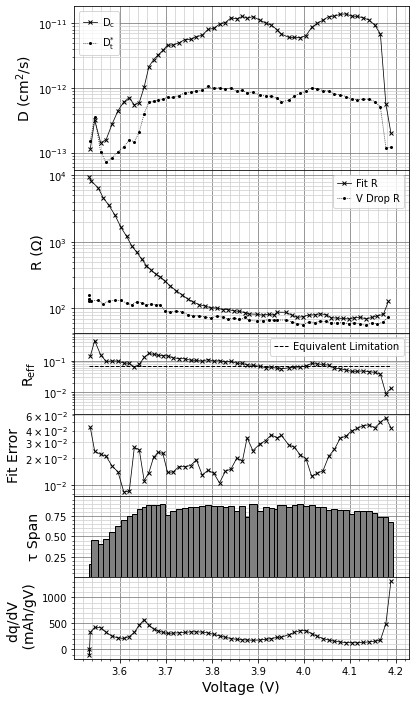

In [21]:
amidr_data.make_summary_graph(fit_data=fit_data)

## Bin Averaging

#### [Optional Arguments (Advanced)](#Bin-Averaging:)

Multiple fittings of different cells with the same material can be compared and averaged together. Because the voltage of each fit is inconsistent cell to cell, averaging is done by binning fit results of a certain voltage range together. Before averaging, outliers known to be erroneous are removed based upon the relative change in capacity ($τ$) span of a fit and the change in $dq/dV$ from fit to fit.

>**path**: The location on your computer where dedicated cell data folders are located. This should be folder containing the *cellpath* folders dedicated to single cells that were defined earlier. Use the "/", not the "\\", for separating directories.

>**cells**: The folder names on your computer where dedicated cell data is stored. Do not include the entire directory location, just the folder names.

>**matname**: The name of the material being measured. It's recommended to also include temperature. All analysis of this material will be sent into a new subfolder of this file name.

>**binsize**: The size of the averaging bins in V. <br> *Default is 0.025*

All files get saved in the directory *path/matname*. 

Found discharge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\266 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\266 NM9505 30C Charge Filtered.xlsx
Found discharge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\269 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\269 NM9505 30C Charge Filtered.xlsx
Found discharge data for cell 270
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\270 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 270
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\270 NM9505 30C Charge Filtered.xlsx
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9

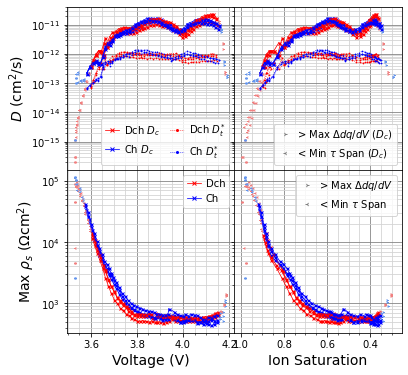

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C Ch vs Dch.jpg


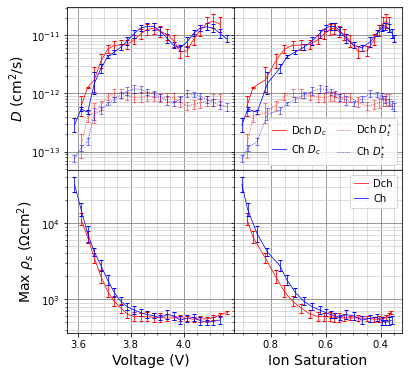

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C All.jpg


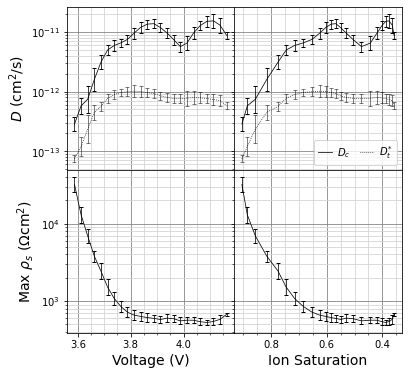

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C (266, 269, 270).xlsx


In [1]:
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
cells = ['266', '269', '270']
matname = 'NM9505 30C'

from amidr import BINAVERAGE
BINAVERAGE(path, cells, matname, binsize = 0.025)

## Material Comparison

Multiple materials can be compared against eachother. 

>**path**: The location on your computer where material data folders are located. This should be same folder containing the *cellpath* folders. Use the "/", not the "\\", for separating directories.

>**mats**: The folder names on your computer where material data is stored. Do not include the entire directory location, just the folder names. These should be the same as the *matname* labels defined earlier.

All files get saved in the directory *path*. 

Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C (266, 269, 270).xlsx
Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\NMC640 30C (243, 246, 259).xlsx
Found data for material: C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\NMC811 30C (239, 272, 276).xlsx
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\Material Comparison (NM9505 30C, NMC640 30C, NMC811 30C).jpg


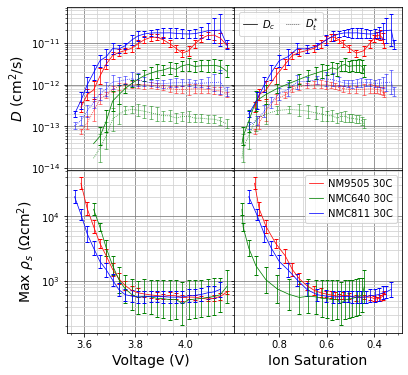

In [2]:
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
mats = ['NM9505 30C', 'NMC640 30C', 'NMC811 30C']
matname = 'NM9505 30C'

from amidr import MATCOMPARE
MATCOMPARE(path, mats)

__________
# Optional Arguments:

### The AMIDR/AMID Object:

>**use_input_cap**: Whether to use the capacity on the file label or to use the total capacity elapsed in the file to calculate rates for labelling. This only impacts pre-fitting outputs and is irrelevant for calculating Diffusivity and Resistance. <br> *Default is True*

>**spliced**: Whether to properly read step numbers for AMID files that have been manually spliced together due to the test having to be restarted on account of power failure or other reasons. Not available for AMIDR. <br> *Default is False*

>**capacitance_corr**: Whether to enable additional processing to neglect the capacity of the double layer capacitance when calculating relative change in capacity ($τ$). Ohmic resistance and double layer are estimated from the lowest voltage pulse. Enabling this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but the correction is imperfect and is not recommended. If enabling this, it is recommended to use a different cell_label. <br> *Default is False* <br> *Irrelevant for AMID*

>**fcap_min**: A fractional value for the lower limit of the relative change in capacity ($τ$) allowed to be considered for data fitting. Raising this may assist with fitting when high rate pulses immediately hit a voltage limit, but is not recommended. If adjusting this, it is recommended to use a different cell_label. <br> *Default is 0.0* <br> *Irrelevant for AMID*

>**force2e**: Whether or not to include counter electrode impedance and force a 3 electrode cell to be analyzed as if it was 2 electrodes. This is ignored if no 3 electrode data is detected. If enabling this, it is recommended to use a different cell_label. <br> *Default is False*

### Data Fitting:

> **D_bounds**: Bounds for $D_{c}$. Results can be somewhat outside these bounds if using AMIDR analysis as technically $R_{eff}$ and $R_{eff}$/$D_{c}$ are being fit to improve fitting accuracy. <br> *Default is \[1.0e-17, 1.0e-8\]*

> **D_guess**: Initial guess for $D_{c}$. <br> *Default is 1.0e-11*

> **R_eff_bounds**: Bounds for $R_{eff}$. This is irrelevant for AMID analysis. <br> *Default is \[1.0e-6, 1.0e1\]* <br> *Irrelevant for AMID*

> **R_eff_guess**: Initial guess for $D_{c}$. This is irrelevant for AMID analysis. <br> *Default is 1.0e-2* <br> *Irrelevant for AMID*

> **remove_out_of_bounds**: Allows for fits with $R_{eff}$ at the bound limits to not be recorded. <br> *Default is True* <br> *Irrelevant for AMID*

> **fcapadj_bounds**: Bounds for the adjustment to the total capacity of an interval for AMID protocol datasets. The cumulative capacity achieved by the final low current pulse used for calculating relative change in capacity ($τ$) is slightly less than the theoretical total capacity. Therefore some positive adjustment is allowed. This is irrelevant for AMIDR analysis. <br> *Default is \[1.0, 1.5\]* <br> *Irrelevant for AMIDR*

> **fcapadj_guess**: Initial guess for the adjustment to the total capacity of an interval for AMID protocol datasets. This is irrelevant for AMIDR analysis. <br> *Default is 1.0* <br> *Irrelevant for AMIDR*

> **shape**: Particle geometry being modeled. Currently supports "sphere" and "plane". <br> *Default is "sphere".*

> **nalpha**: The number of expansion coefficients to use in the Atlung expression. <br> *Default is 4000.*

> **nQ** : The number of $Q$ values (on a log scale) to use in the black Atlung model curve for comparing fit quality. <br> *Default is 4000.*

### Bin Averaging:

>**maxdqdVchange**: The maximum allowed multiplicative increase or decrease in $dq/dV$ from one fit to its adjacent fits. For instance, if one fit has a $dq/dV$ of 500 mAh/gV, the next fit has a $dq/dV$ of 200 mAh/gV and the *maxdqdVchange* is set to 2, then both of these fittings would not included in the averaging because 500/200 = 2.5 > 2. A large change in $dq/dV$ from fitting to fitting suggests that there is a significant change in $dq/dV$ within the fitting which produces error. As the first and last fittings only have single adjacent fittings they are automatically removed as their $dq/dV$ stability cannot be proven. <br> *Default is 2*

>**mincapspan**: The minimum allowed relative change in capacity ($τ$) span of a fitting. Fittings without enough capacity span demostrate that a complete pulse was not achieved. For AMIDR, this also suggests that the relaxation times were inadequate as the protocols are designed for the pulse times to be roughly equivalent to the relaxation times and the time to achieve a complete pulse is roughly equivalent to the time necessary to completely relax. The word "complete" is figurative here as technically neither a pulse nor a relaxation can reach an absolute steady state. <br> *Default is 0.5*

> **parselabel**: An additional label previously appended to the *uhpc_file* label on the exported file names. Use this if you wish to average data containing with this label. If you wish to average data that wasn't given an additional label, ignore this argument. <br> *Default is None*

> **fitlabel**: An additional label previously appended to the *uhpc_file* label on the exported file names. Use this if you wish to average data containing with this label. If you wish to average data that wasn't given an additional label, ignore this argument. <br> *Default is None*

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Form.csv
215_230320_D3,7-3,45V_C01.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Protocol.jpg


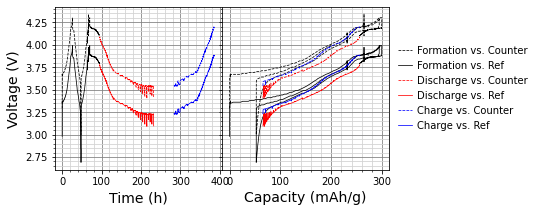

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C OCV Match.jpg


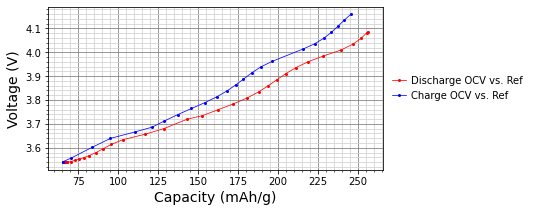

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Form.csv
217_230320_D3,7-3,45V_C03.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Protocol.jpg


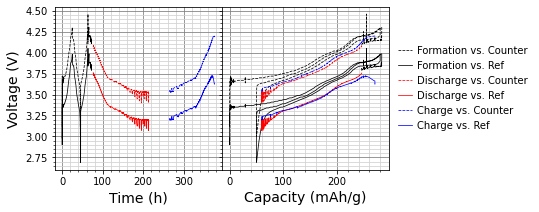

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C OCV Match.jpg


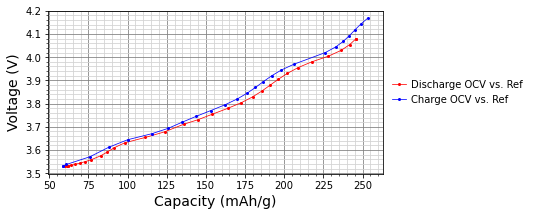

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Form.csv
243_230507_D3,7-3,2V_C06.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Protocol.jpg


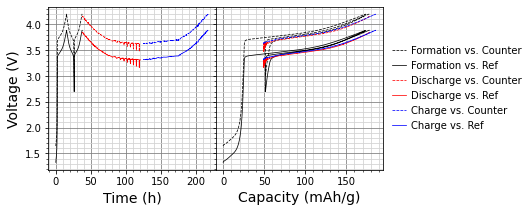

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C OCV Match.jpg


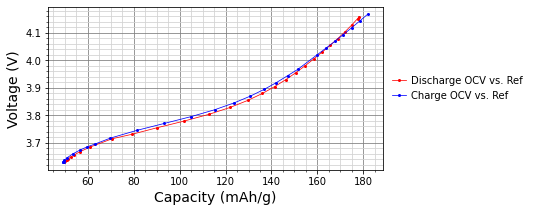

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Form.csv
246_230507_D3,7-3,2V_C08.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Protocol.jpg


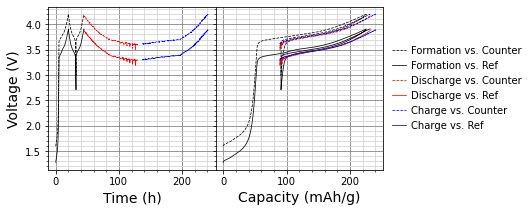

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C OCV Match.jpg


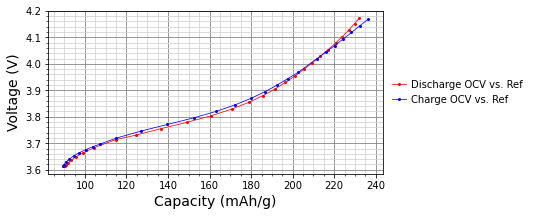

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Form.csv
259_230531_D3,7-3,2V_C09.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Protocol.jpg


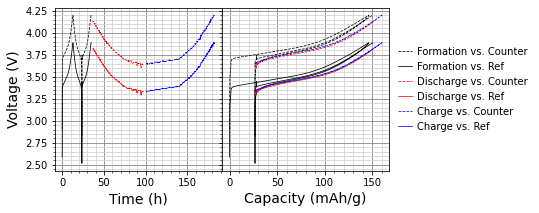

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C OCV Match.jpg


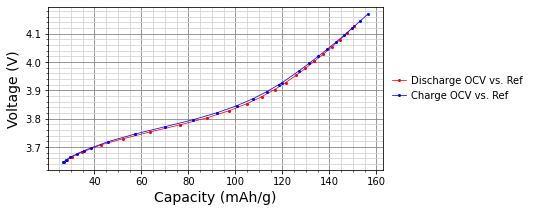

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Form.csv
239_230507_D3,7-3,2V_C05.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Protocol.jpg


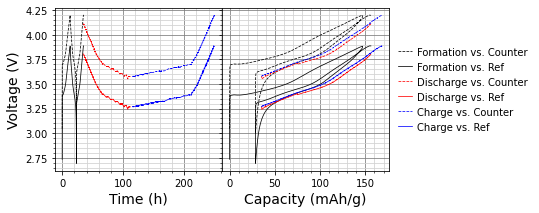

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C OCV Match.jpg


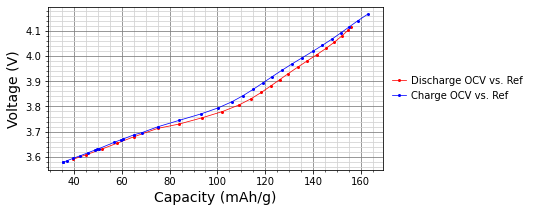

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Form.csv
272_230612_D3,7-3,2V_C06.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Protocol.jpg


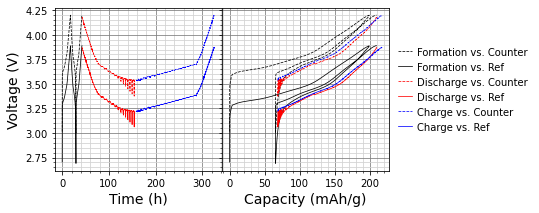

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C OCV Match.jpg


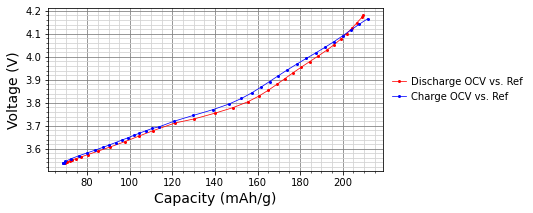

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Form.csv
276_230612_D3,7-3,2V_C11.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Protocol.jpg


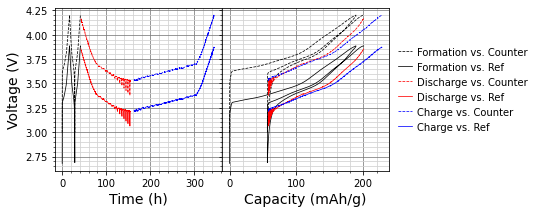

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C OCV Match.jpg


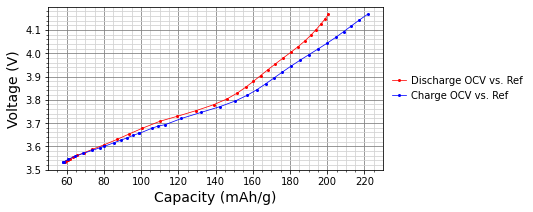

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Form.csv
266_230606_D3,7-3,45V_C08.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Protocol.jpg


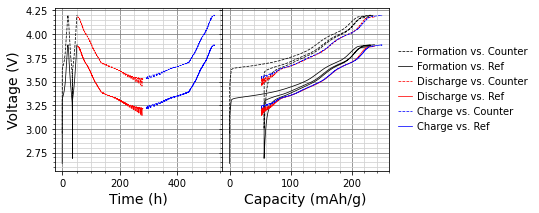

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C OCV Match.jpg


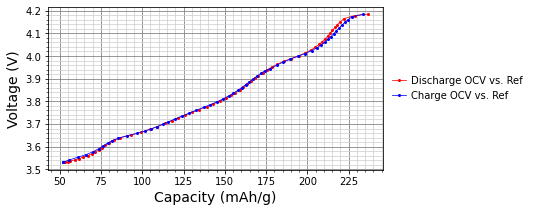

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Form.csv
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Protocol.jpg


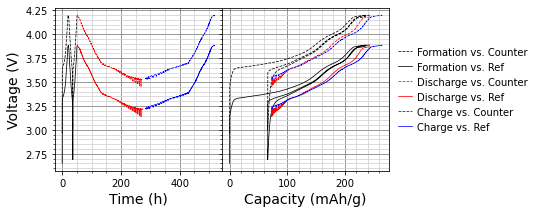

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C OCV Match.jpg


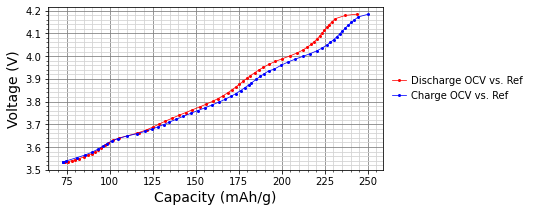

Formation data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Form.csv
Discharge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge.csv
Charge data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Charge.csv
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Protocol.jpg


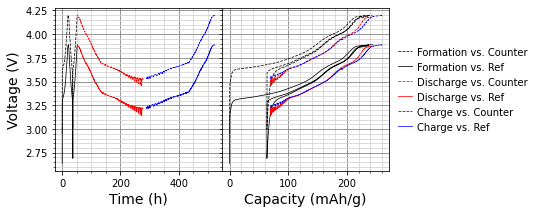

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C OCV Match.jpg


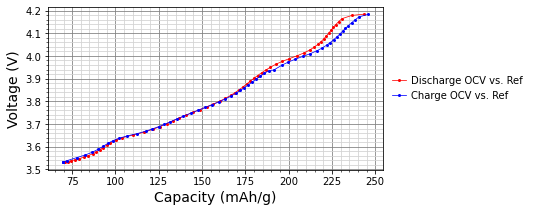

215 NM9505 30C Discharge
Working on cell: 215 NM9505 30C
Positive electrode active mass: 0.000601 g
Input cell capacity: 0.000135 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 93
Starting voltage: 4.087 V
Ending voltage: 3.445 V
Found 31 charge or discharge steps in signature curve sequences.
Found 31 signature curves.
Voltage interval labels: ['4.087 V - 4.083 V', '4.083 V - 4.060 V', '4.060 V - 4.035 V', '4.035 V - 4.009 V', '4.009 V - 3.984 V', '3.984 V - 3.960 V', '3.960 V - 3.936 V', '3.936 V - 3.911 V', '3.911 V - 3.886 V', '3.886 V - 3.860 V', '3.860 V - 3.834 V', '3.834 V - 3.808 V', '3.808 V - 3.783 V', '3.783 V - 3.759 V', '3.759 V - 3.734 V', '3.734 V - 3.710 V', '3.720 V - 3.680 V', '3.680 V - 3.656 V', '3.656 V - 3.634 V', '3.634 V - 3.614 V', '3.614 V - 3.596 V', '3.596 V - 3.580 V', '3.580 V - 3.566 V', '3.566 V - 3.559 V', '3.559 V - 3.552 V', '3.

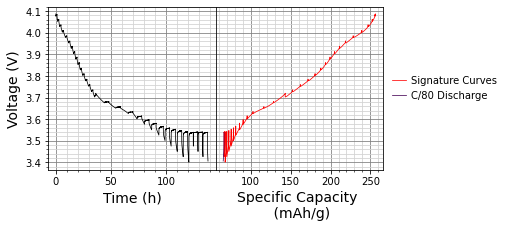

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Discharge\215 NM9505 30C Discharge Parsed.jpg


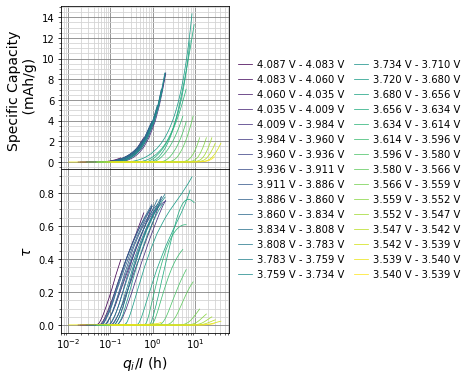

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.087 V - 4.083 V: [-11.309  -1.365   9.944]
4.083 V - 4.060 V: [-11.53   -1.545   9.985]
4.060 V - 4.035 V: [-11.665  -1.558  10.107]
4.035 V - 4.009 V: [-11.821  -1.554  10.267]
4.009 V - 3.984 V: [-11.885  -1.466  10.419]
3.984 V - 3.960 V: [-11.704  -1.35   10.355]
3.960 V - 3.936 V: [-11.623  -1.389  10.234]
3.936 V - 3.911 V: [-11.586  -1.466  10.12 ]
3.911 V - 3.886 V: [-11.524  -1.485  10.039]
3.886 V - 3.860 V: [-11.524  -1.511  10.013]
3.860 V - 3.834 V: [-11.56   -1.518  10.042]
3.834 V - 3.808 V: [-11.627  -1.507  10.119]
3.808 V - 3.783 V: [-11.688  -1.476  10.213]
3.783 V - 3.759 V: [-11.705  -1.407  10.299]
3.759 V - 3.734 V: [-11.699  -1.338  10.361]
3.734 V - 3.710 V: [-11.732  -1.306  10.427]
3.720 V - 3.680 V: [-12.009  -1.425  10.584]
3.680 V - 3.656 V: [-12.324  -1.444  10.88 ]
3.656 V - 3.634 V: [-12.251  -1.05   11.201]
3.634 V - 3.614 V: [-12.285  -1.214  11.071]
3.614 V - 3.596 V: [-12.615  -1.406  11.209]
3.59

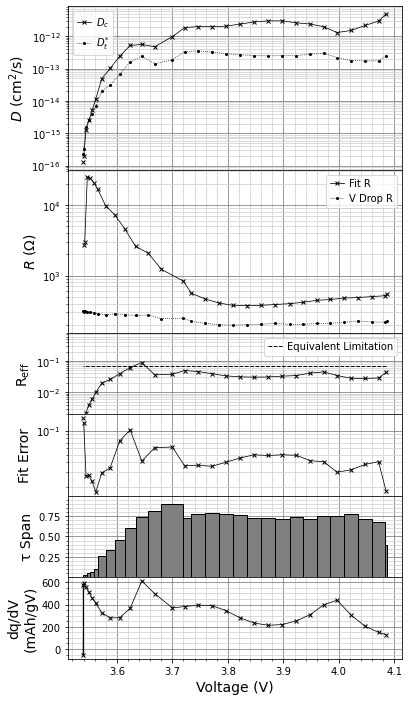

215 NM9505 30C Charge
Working on cell: 215 NM9505 30C
Positive electrode active mass: 0.000601 g
Input cell capacity: 0.000135 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 78
Starting voltage: 3.542 V
Ending voltage: 4.198 V
Found 26 charge or discharge steps in signature curve sequences.
Found 26 signature curves.
Voltage interval labels: ['3.542 V - 3.542 V', '3.542 V - 3.542 V', '3.542 V - 3.556 V', '3.556 V - 3.602 V', '3.602 V - 3.639 V', '3.639 V - 3.667 V', '3.667 V - 3.692 V', '3.686 V - 3.712 V', '3.712 V - 3.739 V', '3.739 V - 3.764 V', '3.764 V - 3.790 V', '3.790 V - 3.814 V', '3.814 V - 3.838 V', '3.838 V - 3.863 V', '3.863 V - 3.888 V', '3.888 V - 3.913 V', '3.913 V - 3.939 V', '3.939 V - 3.963 V', '3.963 V - 4.013 V', '4.013 V - 4.036 V', '4.036 V - 4.060 V', '4.060 V - 4.083 V', '4.083 V - 4.108 V', '4.108 V - 4.134 V', '4.134 V - 4.160 V', '4.160

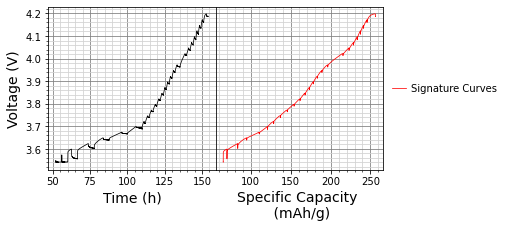

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\215\215 NM9505 30C Charge\215 NM9505 30C Charge Parsed.jpg


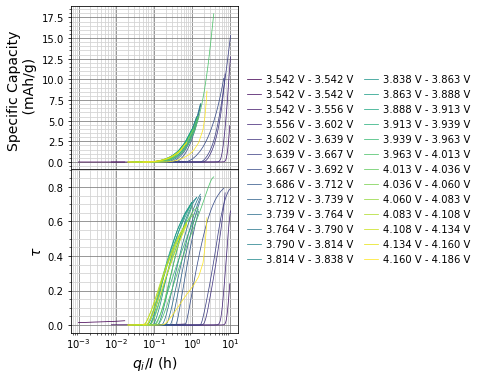

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.542 V - 3.542 V: No fit within Reff bounds
3.542 V - 3.542 V: No fit within Reff bounds
3.542 V - 3.556 V: [-12.136   0.045  12.182]
3.556 V - 3.602 V: No fit within Reff bounds
3.602 V - 3.639 V: [-12.33  -0.74  11.59]
3.639 V - 3.667 V: [-12.321  -0.811  11.51 ]
3.667 V - 3.692 V: [-12.021  -0.928  11.093]
3.686 V - 3.712 V: [-11.61   -0.753  10.857]
3.712 V - 3.739 V: [-11.684  -0.984  10.7  ]
3.739 V - 3.764 V: [-11.715  -1.138  10.578]
3.764 V - 3.790 V: [-11.662  -1.189  10.473]
3.790 V - 3.814 V: [-11.562  -1.204  10.358]
3.814 V - 3.838 V: [-11.51   -1.286  10.224]
3.838 V - 3.863 V: [-11.482  -1.36   10.123]
3.863 V - 3.888 V: [-11.495  -1.437  10.059]
3.888 V - 3.913 V: [-11.548  -1.488  10.06 ]
3.913 V - 3.939 V: [-11.637  -1.522  10.115]
3.939 V - 3.963 V: [-11.828  -1.592  10.236]
3.963 V - 4.013 V: [-11.921  -1.589  10.332]
4.013 V - 4.036 V: [-11.656  -1.371  10.285]
4.036 V - 4.060 V: [-11.606  -1.466  10.14 ]
4.060 V

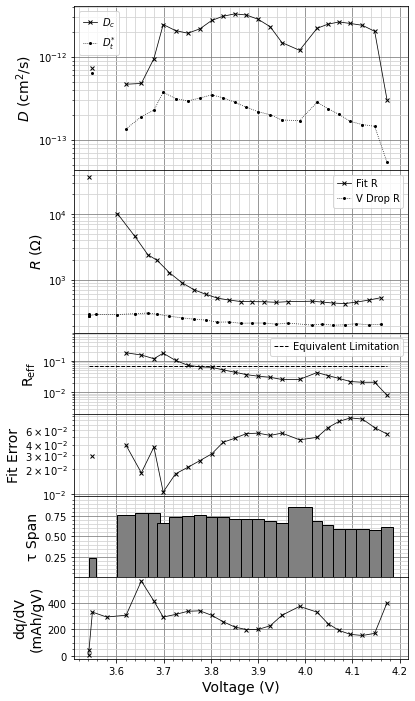

217 NM9505 30C Discharge
Working on cell: 217 NM9505 30C
Positive electrode active mass: 0.000743 g
Input cell capacity: 0.000167 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 93
Starting voltage: 4.080 V
Ending voltage: 3.451 V
Found 31 charge or discharge steps in signature curve sequences.
Found 31 signature curves.
Voltage interval labels: ['4.080 V - 4.078 V', '4.078 V - 4.055 V', '4.055 V - 4.030 V', '4.030 V - 4.004 V', '4.004 V - 3.980 V', '3.980 V - 3.955 V', '3.955 V - 3.930 V', '3.930 V - 3.905 V', '3.905 V - 3.880 V', '3.880 V - 3.855 V', '3.855 V - 3.829 V', '3.829 V - 3.804 V', '3.804 V - 3.779 V', '3.779 V - 3.755 V', '3.755 V - 3.730 V', '3.730 V - 3.706 V', '3.711 V - 3.678 V', '3.678 V - 3.654 V', '3.654 V - 3.631 V', '3.631 V - 3.610 V', '3.610 V - 3.591 V', '3.591 V - 3.575 V', '3.575 V - 3.558 V', '3.558 V - 3.550 V', '3.550 V - 3.544 V', '3.

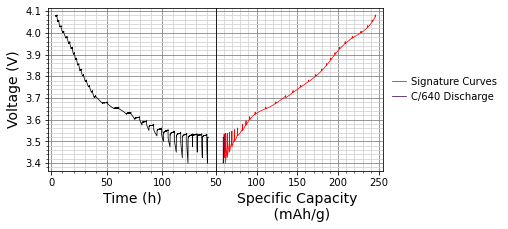

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Discharge\217 NM9505 30C Discharge Parsed.jpg


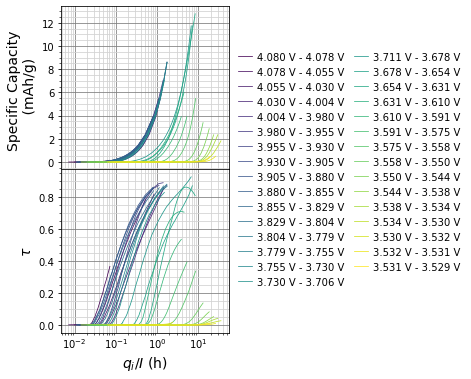

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.080 V - 4.078 V: [-10.936  -1.303   9.634]
4.078 V - 4.055 V: [-11.254  -1.536   9.718]
4.055 V - 4.030 V: [-11.405  -1.582   9.823]
4.030 V - 4.004 V: [-11.566  -1.594   9.972]
4.004 V - 3.980 V: [-11.556  -1.466  10.091]
3.980 V - 3.955 V: [-11.288  -1.314   9.974]
3.955 V - 3.930 V: [-11.207  -1.379   9.828]
3.930 V - 3.905 V: [-11.161  -1.425   9.736]
3.905 V - 3.880 V: [-11.122  -1.457   9.665]
3.880 V - 3.855 V: [-11.15   -1.511   9.639]
3.855 V - 3.829 V: [-11.211  -1.539   9.672]
3.829 V - 3.804 V: [-11.315  -1.551   9.765]
3.804 V - 3.779 V: [-11.393  -1.521   9.873]
3.779 V - 3.755 V: [-11.43   -1.463   9.967]
3.755 V - 3.730 V: [-11.442  -1.394  10.048]
3.730 V - 3.706 V: [-11.501  -1.363  10.137]
3.711 V - 3.678 V: [-11.796  -1.43   10.366]
3.678 V - 3.654 V: [-12.158  -1.502  10.656]
3.654 V - 3.631 V: [-11.98  -0.98  11.  ]
3.631 V - 3.610 V: [-11.965  -1.138  10.828]
3.610 V - 3.591 V: [-12.428  -1.439  10.988]
3.591 V

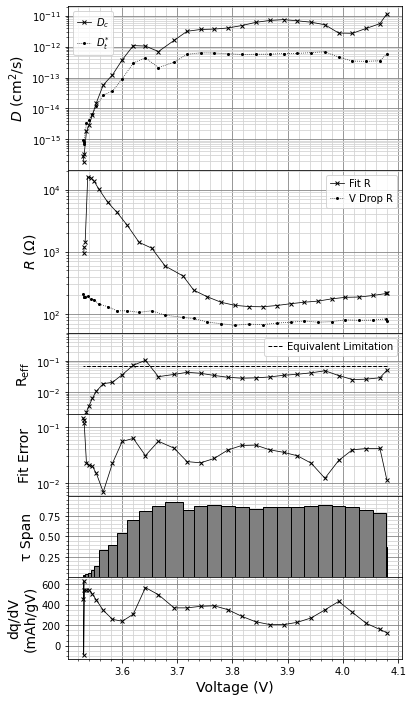

217 NM9505 30C Charge
Working on cell: 217 NM9505 30C
Positive electrode active mass: 0.000743 g
Input cell capacity: 0.000167 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 78
Starting voltage: 3.532 V
Ending voltage: 4.198 V
Found 26 charge or discharge steps in signature curve sequences.
Found 26 signature curves.
Voltage interval labels: ['3.532 V - 3.532 V', '3.532 V - 3.538 V', '3.538 V - 3.571 V', '3.571 V - 3.612 V', '3.612 V - 3.644 V', '3.644 V - 3.671 V', '3.671 V - 3.696 V', '3.694 V - 3.719 V', '3.719 V - 3.745 V', '3.745 V - 3.770 V', '3.770 V - 3.795 V', '3.795 V - 3.820 V', '3.820 V - 3.845 V', '3.845 V - 3.870 V', '3.870 V - 3.895 V', '3.895 V - 3.920 V', '3.920 V - 3.945 V', '3.945 V - 3.970 V', '3.970 V - 4.020 V', '4.020 V - 4.044 V', '4.044 V - 4.069 V', '4.069 V - 4.093 V', '4.093 V - 4.118 V', '4.118 V - 4.143 V', '4.143 V - 4.169 V', '4.169

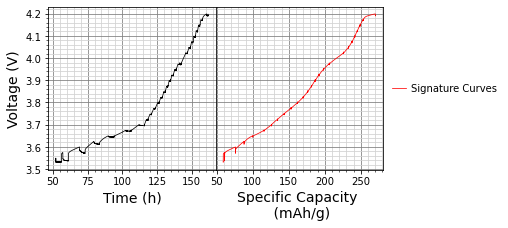

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\217\217 NM9505 30C Charge\217 NM9505 30C Charge Parsed.jpg


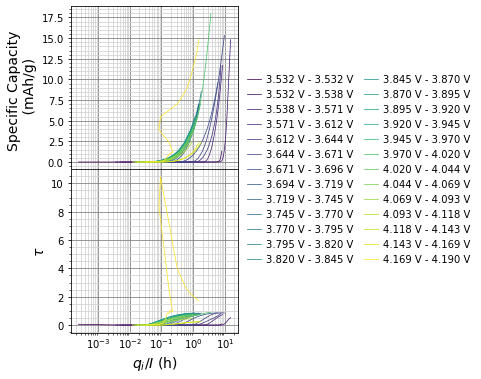

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.532 V - 3.532 V: No fit within Reff bounds
3.532 V - 3.538 V: No fit within Reff bounds
3.538 V - 3.571 V: [-11.998   0.219  12.217]
3.571 V - 3.612 V: [-12.317  -0.678  11.639]
3.612 V - 3.644 V: [-12.488  -1.134  11.354]
3.644 V - 3.671 V: [-12.006  -0.755  11.25 ]
3.671 V - 3.696 V: [-11.873  -1.059  10.814]
3.694 V - 3.719 V: [-11.606  -1.028  10.578]
3.719 V - 3.745 V: [-11.592  -1.191  10.401]
3.745 V - 3.770 V: [-11.574  -1.306  10.267]
3.770 V - 3.795 V: [-11.444  -1.297  10.148]
3.795 V - 3.820 V: [-11.281  -1.282   9.999]
3.820 V - 3.845 V: [-11.165  -1.318   9.848]
3.845 V - 3.870 V: [-11.107  -1.366   9.74 ]
3.870 V - 3.895 V: [-11.138  -1.429   9.71 ]
3.895 V - 3.920 V: [-11.243  -1.531   9.712]
3.920 V - 3.945 V: [-11.397  -1.622   9.775]
3.945 V - 3.970 V: [-11.644  -1.726   9.917]
3.970 V - 4.020 V: [-11.711  -1.683  10.028]
4.020 V - 4.044 V: [-11.435  -1.532   9.903]
4.044 V - 4.069 V: [-11.409  -1.648   9.76 ]
4.06

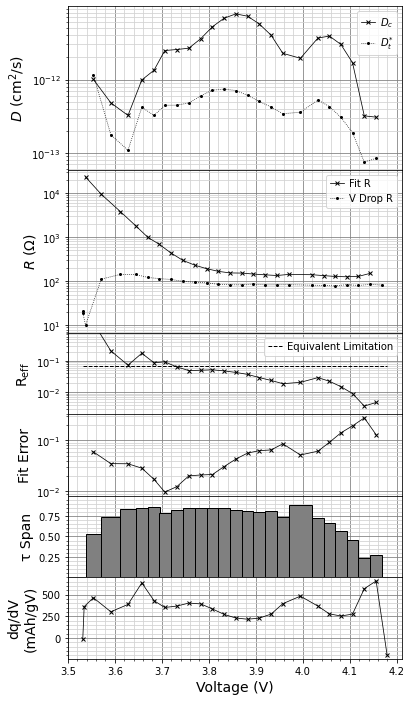

243 NMC640 30C Discharge
Working on cell: 243 NMC640 30C
Positive electrode active mass: 0.001259 g
Input cell capacity: 0.000283 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 81
Starting voltage: 4.159 V
Ending voltage: 3.518 V
Found 27 charge or discharge steps in signature curve sequences.
Found 27 signature curves.
Voltage interval labels: ['4.159 V - 4.152 V', '4.152 V - 4.128 V', '4.128 V - 4.104 V', '4.104 V - 4.079 V', '4.079 V - 4.054 V', '4.054 V - 4.029 V', '4.029 V - 4.004 V', '4.004 V - 3.980 V', '3.980 V - 3.955 V', '3.955 V - 3.930 V', '3.930 V - 3.905 V', '3.905 V - 3.880 V', '3.880 V - 3.854 V', '3.854 V - 3.829 V', '3.829 V - 3.804 V', '3.804 V - 3.779 V', '3.779 V - 3.755 V', '3.755 V - 3.731 V', '3.731 V - 3.710 V', '3.715 V - 3.685 V', '3.685 V - 3.669 V', '3.669 V - 3.657 V', '3.657 V - 3.649 V', '3.649 V - 3.643 V', '3.643 V - 3.639 V', '3.

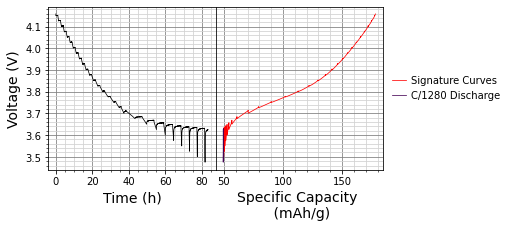

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Discharge\243 NMC640 30C Discharge Parsed.jpg


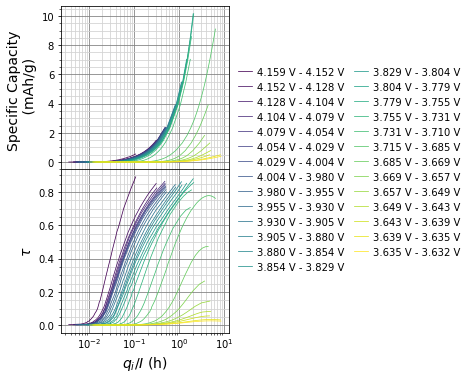

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.159 V - 4.152 V: [-11.089  -1.479   9.61 ]
4.152 V - 4.128 V: [-11.407  -1.75    9.657]
4.128 V - 4.104 V: [-11.45   -1.758   9.692]
4.104 V - 4.079 V: [-11.494  -1.819   9.674]
4.079 V - 4.054 V: [-11.512  -1.808   9.705]
4.054 V - 4.029 V: [-11.532  -1.828   9.704]
4.029 V - 4.004 V: [-11.544  -1.835   9.71 ]
4.004 V - 3.980 V: [-11.575  -1.87    9.704]
3.980 V - 3.955 V: [-11.624  -1.878   9.746]
3.955 V - 3.930 V: [-11.644  -1.837   9.807]
3.930 V - 3.905 V: [-11.721  -1.89    9.831]
3.905 V - 3.880 V: [-11.783  -1.898   9.884]
3.880 V - 3.854 V: [-11.795  -1.845   9.95 ]
3.854 V - 3.829 V: [-11.828  -1.859   9.968]
3.829 V - 3.804 V: [-11.867  -1.822  10.045]
3.804 V - 3.779 V: [-11.913  -1.812  10.101]
3.779 V - 3.755 V: [-11.975  -1.766  10.209]
3.755 V - 3.731 V: [-12.097  -1.762  10.335]
3.731 V - 3.710 V: [-12.364  -1.902  10.462]
3.715 V - 3.685 V: [-12.655  -2.073  10.583]
3.685 V - 3.669 V: [-13.234  -2.588  10.646]
3.66

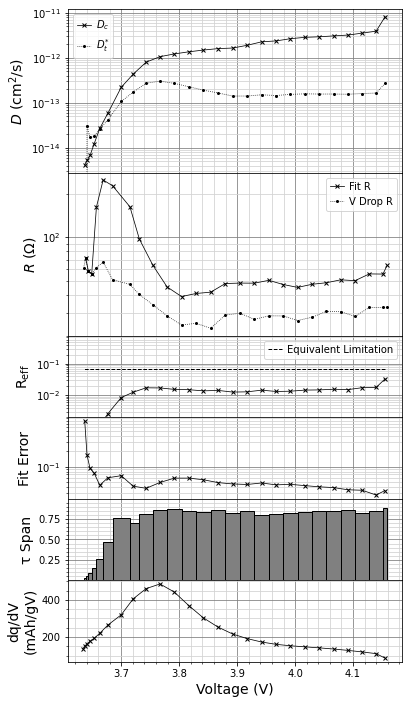

243 NMC640 30C Charge
Working on cell: 243 NMC640 30C
Positive electrode active mass: 0.001259 g
Input cell capacity: 0.000283 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 81
Starting voltage: 3.629 V
Ending voltage: 4.191 V
Found 27 charge or discharge steps in signature curve sequences.
Found 27 signature curves.
Voltage interval labels: ['3.629 V - 3.630 V', '3.630 V - 3.632 V', '3.632 V - 3.637 V', '3.637 V - 3.646 V', '3.646 V - 3.660 V', '3.660 V - 3.674 V', '3.674 V - 3.686 V', '3.686 V - 3.697 V', '3.696 V - 3.717 V', '3.717 V - 3.745 V', '3.745 V - 3.771 V', '3.771 V - 3.796 V', '3.796 V - 3.821 V', '3.821 V - 3.845 V', '3.845 V - 3.870 V', '3.870 V - 3.895 V', '3.895 V - 3.919 V', '3.919 V - 3.944 V', '3.944 V - 3.967 V', '3.967 V - 4.019 V', '4.019 V - 4.044 V', '4.044 V - 4.068 V', '4.068 V - 4.093 V', '4.093 V - 4.118 V', '4.118 V - 4.143 V', '4.143

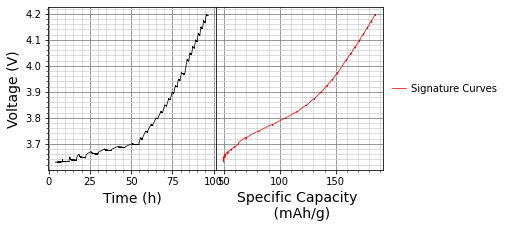

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\243\243 NMC640 30C Charge\243 NMC640 30C Charge Parsed.jpg


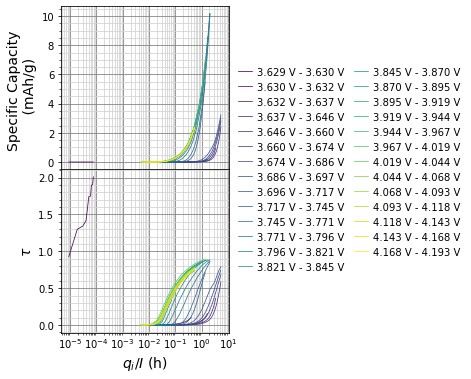

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.629 V - 3.630 V: No fit within Reff bounds
3.630 V - 3.632 V: [-13.229  -3.712   9.516]
3.632 V - 3.637 V: [-13.767  -3.606  10.161]
3.637 V - 3.646 V: [-13.845  -3.29   10.555]
3.646 V - 3.660 V: [-13.595  -2.301  11.294]
3.660 V - 3.674 V: [-13.391  -2.265  11.126]
3.674 V - 3.686 V: [-13.251  -2.178  11.073]
3.686 V - 3.697 V: [-13.079  -2.132  10.947]
3.696 V - 3.717 V: [-12.652  -1.767  10.886]
3.717 V - 3.745 V: [-12.478  -1.707  10.771]
3.745 V - 3.771 V: [-12.175  -1.691  10.484]
3.771 V - 3.796 V: [-11.902  -1.598  10.304]
3.796 V - 3.821 V: [-11.688  -1.538  10.15 ]
3.821 V - 3.845 V: [-11.575  -1.547  10.028]
3.845 V - 3.870 V: [-11.535  -1.569   9.966]
3.870 V - 3.895 V: [-11.532  -1.638   9.893]
3.895 V - 3.919 V: [-11.547  -1.764   9.783]
3.919 V - 3.944 V: [-11.533  -1.756   9.777]
3.944 V - 3.967 V: [-11.633  -1.901   9.733]
3.967 V - 4.019 V: [-11.495  -1.817   9.677]
4.019 V - 4.044 V: [-11.596  -1.898   9.698]
4.04

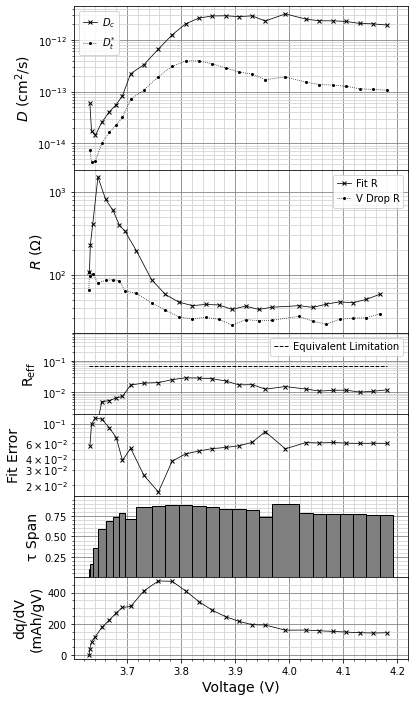

246 NMC640 30C Discharge
Working on cell: 246 NMC640 30C
Positive electrode active mass: 0.0012079999999999999 g
Input cell capacity: 0.000272 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 78
Starting voltage: 4.172 V
Ending voltage: 3.547 V
Found 26 charge or discharge steps in signature curve sequences.
Found 26 signature curves.
Voltage interval labels: ['4.172 V - 4.151 V', '4.151 V - 4.127 V', '4.127 V - 4.103 V', '4.103 V - 4.078 V', '4.078 V - 4.054 V', '4.054 V - 4.029 V', '4.029 V - 4.004 V', '4.004 V - 3.979 V', '3.979 V - 3.955 V', '3.955 V - 3.930 V', '3.930 V - 3.904 V', '3.904 V - 3.879 V', '3.879 V - 3.854 V', '3.854 V - 3.829 V', '3.829 V - 3.804 V', '3.804 V - 3.779 V', '3.779 V - 3.755 V', '3.755 V - 3.731 V', '3.731 V - 3.708 V', '3.714 V - 3.683 V', '3.683 V - 3.664 V', '3.664 V - 3.648 V', '3.648 V - 3.636 V', '3.636 V - 3.626 V', '3.626 V - 

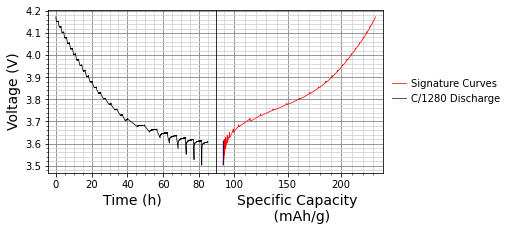

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Discharge\246 NMC640 30C Discharge Parsed.jpg


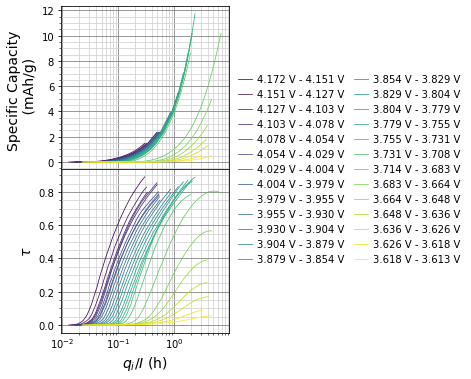

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.172 V - 4.151 V: [-11.301  -1.312   9.989]
4.151 V - 4.127 V: [-11.461  -1.423  10.038]
4.127 V - 4.103 V: [-11.533  -1.441  10.092]
4.103 V - 4.078 V: [-11.578  -1.48   10.098]
4.078 V - 4.054 V: [-11.552  -1.422  10.13 ]
4.054 V - 4.029 V: [-11.646  -1.5    10.146]
4.029 V - 4.004 V: [-11.69   -1.514  10.175]
4.004 V - 3.979 V: [-11.69   -1.498  10.192]
3.979 V - 3.955 V: [-11.747  -1.526  10.222]
3.955 V - 3.930 V: [-11.788  -1.511  10.276]
3.930 V - 3.904 V: [-11.833  -1.506  10.327]
3.904 V - 3.879 V: [-11.89   -1.519  10.371]
3.879 V - 3.854 V: [-11.922  -1.496  10.426]
3.854 V - 3.829 V: [-11.967  -1.49   10.477]
3.829 V - 3.804 V: [-12.005  -1.458  10.547]
3.804 V - 3.779 V: [-12.049  -1.463  10.586]
3.779 V - 3.755 V: [-12.061  -1.423  10.638]
3.755 V - 3.731 V: [-12.07   -1.385  10.685]
3.731 V - 3.708 V: [-12.179  -1.43   10.749]
3.714 V - 3.683 V: [-12.557  -1.735  10.822]
3.683 V - 3.664 V: [-13.001  -2.17   10.831]
3.66

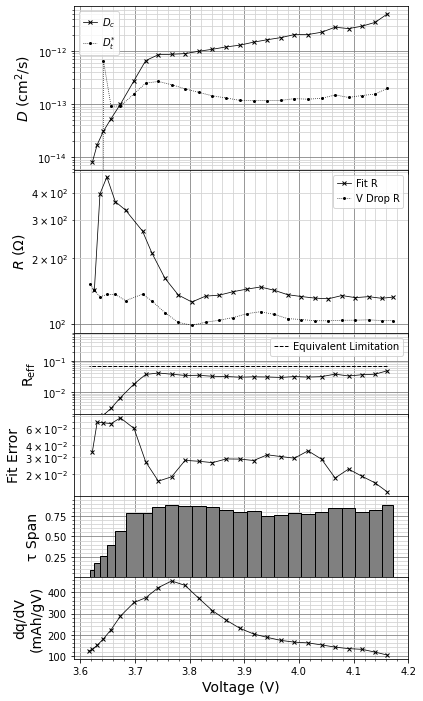

246 NMC640 30C Charge
Working on cell: 246 NMC640 30C
Positive electrode active mass: 0.0012079999999999999 g
Input cell capacity: 0.000272 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 84
Starting voltage: 3.613 V
Ending voltage: 4.188 V
Found 28 charge or discharge steps in signature curve sequences.
Found 28 signature curves.
Voltage interval labels: ['3.613 V - 3.615 V', '3.615 V - 3.619 V', '3.619 V - 3.628 V', '3.628 V - 3.639 V', '3.639 V - 3.653 V', '3.653 V - 3.664 V', '3.664 V - 3.676 V', '3.676 V - 3.687 V', '3.687 V - 3.698 V', '3.697 V - 3.719 V', '3.719 V - 3.746 V', '3.746 V - 3.771 V', '3.771 V - 3.796 V', '3.796 V - 3.821 V', '3.821 V - 3.845 V', '3.845 V - 3.870 V', '3.870 V - 3.895 V', '3.895 V - 3.920 V', '3.920 V - 3.944 V', '3.944 V - 3.968 V', '3.968 V - 4.019 V', '4.019 V - 4.044 V', '4.044 V - 4.069 V', '4.069 V - 4.093 V', '4.093 V - 4.1

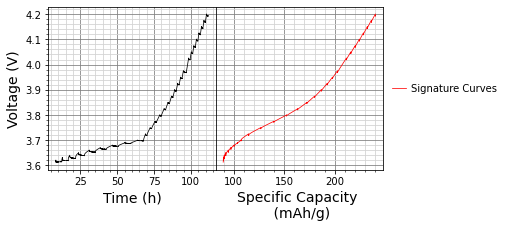

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\246\246 NMC640 30C Charge\246 NMC640 30C Charge Parsed.jpg


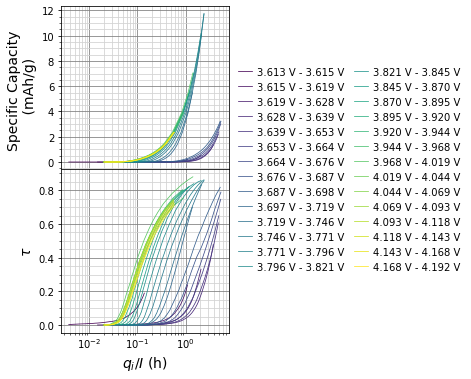

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.613 V - 3.615 V: [-12.601  -4.188   8.414]
3.615 V - 3.619 V: [-13.39   -3.027  10.363]
3.619 V - 3.628 V: [-13.613  -2.902  10.711]
3.628 V - 3.639 V: [-13.565  -2.46   11.105]
3.639 V - 3.653 V: [-13.417  -2.245  11.172]
3.653 V - 3.664 V: [-13.312  -2.188  11.124]
3.664 V - 3.676 V: [-13.164  -2.064  11.1  ]
3.676 V - 3.687 V: [-13.027  -1.977  11.05 ]
3.687 V - 3.698 V: [-12.876  -1.901  10.976]
3.697 V - 3.719 V: [-12.529  -1.597  10.933]
3.719 V - 3.746 V: [-12.4   -1.51  10.89]
3.746 V - 3.771 V: [-12.226  -1.438  10.788]
3.771 V - 3.796 V: [-12.102  -1.394  10.708]
3.796 V - 3.821 V: [-11.968  -1.358  10.61 ]
3.821 V - 3.845 V: [-11.866  -1.343  10.523]
3.845 V - 3.870 V: [-11.826  -1.366  10.46 ]
3.870 V - 3.895 V: [-11.787  -1.417  10.37 ]
3.895 V - 3.920 V: [-11.76  -1.47  10.29]
3.920 V - 3.944 V: [-11.729  -1.503  10.227]
3.944 V - 3.968 V: [-11.78   -1.576  10.204]
3.968 V - 4.019 V: [-11.656  -1.524  10.132]
4.019 V - 

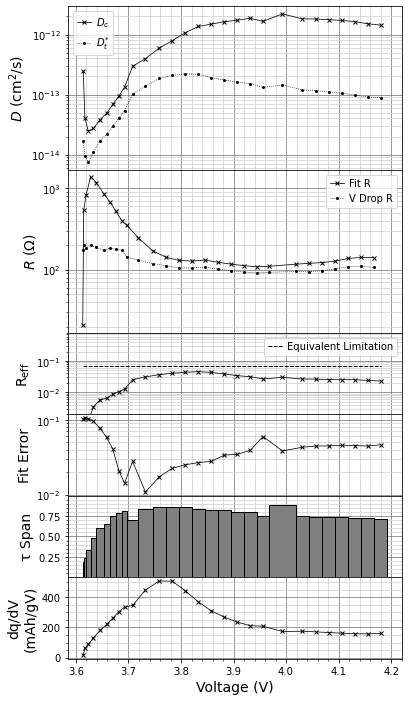

259 NMC640 30C Discharge
Working on cell: 259 NMC640 30C
Positive electrode active mass: 0.0026869999999999997 g
Input cell capacity: 0.000604 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 63
Starting voltage: 4.128 V
Ending voltage: 3.639 V
Found 21 charge or discharge steps in signature curve sequences.
Found 21 signature curves.
Voltage interval labels: ['4.128 V - 4.126 V', '4.126 V - 4.103 V', '4.103 V - 4.078 V', '4.078 V - 4.053 V', '4.053 V - 4.028 V', '4.028 V - 4.003 V', '4.003 V - 3.978 V', '3.978 V - 3.953 V', '3.953 V - 3.928 V', '3.928 V - 3.903 V', '3.903 V - 3.878 V', '3.878 V - 3.853 V', '3.853 V - 3.828 V', '3.828 V - 3.803 V', '3.803 V - 3.778 V', '3.778 V - 3.753 V', '3.753 V - 3.729 V', '3.729 V - 3.706 V', '3.708 V - 3.682 V', '3.682 V - 3.665 V', '3.665 V - 3.655 V']
Found 21 voltage intervals.
Parsed data exporting to:
C:\Users\Mitch\Lab\A

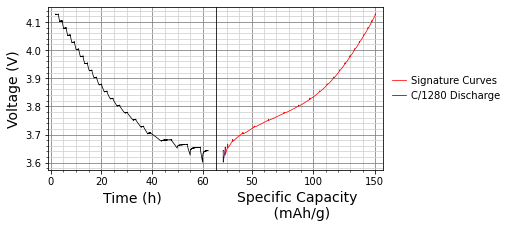

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Discharge\259 NMC640 30C Discharge Parsed.jpg


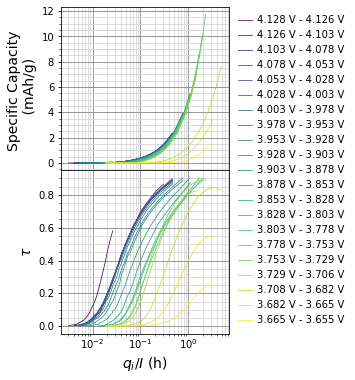

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.128 V - 4.126 V: [-10.961  -1.61    9.351]
4.126 V - 4.103 V: [-11.328  -1.852   9.475]
4.103 V - 4.078 V: [-11.336  -1.903   9.433]
4.078 V - 4.053 V: [-11.345  -1.941   9.404]
4.053 V - 4.028 V: [-11.378  -1.961   9.417]
4.028 V - 4.003 V: [-11.332  -1.901   9.432]
4.003 V - 3.978 V: [-11.363  -1.976   9.387]
3.978 V - 3.953 V: [-11.389  -1.989   9.4  ]
3.953 V - 3.928 V: [-11.426  -1.987   9.439]
3.928 V - 3.903 V: [-11.501  -2.032   9.469]
3.903 V - 3.878 V: [-11.518  -1.948   9.571]
3.878 V - 3.853 V: [-11.674  -1.973   9.702]
3.853 V - 3.828 V: [-11.793  -1.885   9.908]
3.828 V - 3.803 V: [-11.931  -1.925  10.006]
3.803 V - 3.778 V: [-11.957  -1.933  10.024]
3.778 V - 3.753 V: [-11.987  -1.82   10.167]
3.753 V - 3.729 V: [-11.944  -1.746  10.198]
3.729 V - 3.706 V: [-12.071  -1.858  10.214]
3.708 V - 3.682 V: [-12.451  -2.088  10.363]
3.682 V - 3.665 V: [-12.927  -2.457  10.47 ]
3.665 V - 3.655 V: [-13.495  -2.968  10.528]
Figu

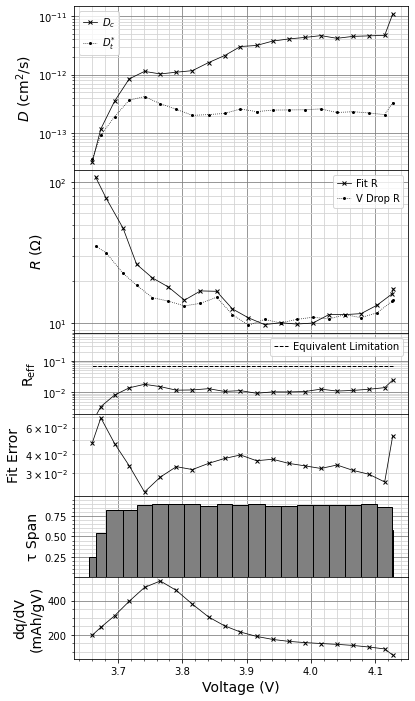

259 NMC640 30C Charge
Working on cell: 259 NMC640 30C
Positive electrode active mass: 0.0026869999999999997 g
Input cell capacity: 0.000604 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 78
Starting voltage: 3.646 V
Ending voltage: 4.192 V
Found 26 charge or discharge steps in signature curve sequences.
Found 26 signature curves.
Voltage interval labels: ['3.646 V - 3.647 V', '3.647 V - 3.654 V', '3.654 V - 3.664 V', '3.664 V - 3.676 V', '3.676 V - 3.687 V', '3.687 V - 3.698 V', '3.697 V - 3.719 V', '3.719 V - 3.746 V', '3.746 V - 3.771 V', '3.771 V - 3.796 V', '3.796 V - 3.821 V', '3.821 V - 3.846 V', '3.846 V - 3.871 V', '3.871 V - 3.896 V', '3.896 V - 3.921 V', '3.921 V - 3.928 V', '3.928 V - 3.970 V', '3.970 V - 3.995 V', '3.995 V - 4.020 V', '4.020 V - 4.045 V', '4.045 V - 4.070 V', '4.070 V - 4.095 V', '4.095 V - 4.120 V', '4.120 V - 4.145 V', '4.145 V - 4.1

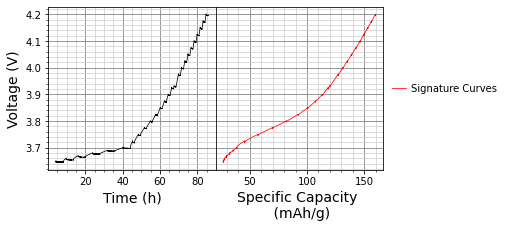

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\259\259 NMC640 30C Charge\259 NMC640 30C Charge Parsed.jpg


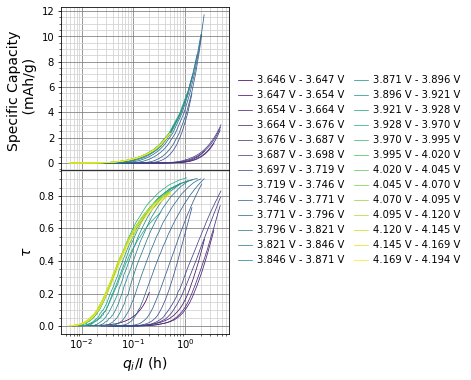

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.646 V - 3.647 V: [-12.694  -2.917   9.777]
3.647 V - 3.654 V: [-13.269  -2.547  10.721]
3.654 V - 3.664 V: [-13.331  -2.376  10.956]
3.664 V - 3.676 V: [-13.201  -2.164  11.037]
3.676 V - 3.687 V: [-13.08   -2.254  10.826]
3.687 V - 3.698 V: [-12.932  -2.072  10.86 ]
3.697 V - 3.719 V: [-12.584  -1.724  10.86 ]
3.719 V - 3.746 V: [-12.449  -1.762  10.687]
3.746 V - 3.771 V: [-12.127  -1.597  10.53 ]
3.771 V - 3.796 V: [-11.935  -1.614  10.321]
3.796 V - 3.821 V: [-11.784  -1.606  10.178]
3.821 V - 3.846 V: [-11.687  -1.644  10.043]
3.846 V - 3.871 V: [-11.618  -1.682   9.936]
3.871 V - 3.896 V: [-11.564  -1.744   9.82 ]
3.896 V - 3.921 V: [-11.537  -1.787   9.751]
3.921 V - 3.928 V: [-11.662  -1.911   9.751]
3.928 V - 3.970 V: [-11.474  -1.802   9.671]
3.970 V - 3.995 V: [-11.512  -1.882   9.63 ]
3.995 V - 4.020 V: [-11.512  -1.924   9.588]
4.020 V - 4.045 V: [-11.514  -1.923   9.591]
4.045 V - 4.070 V: [-11.516  -1.931   9.585]
4.07

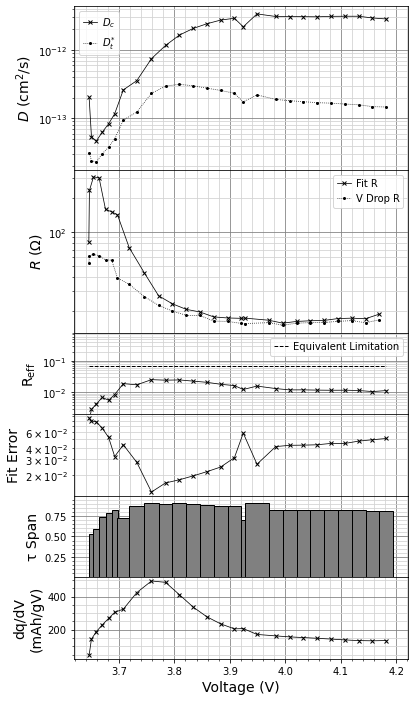

239 NMC811 30C Discharge
Working on cell: 239 NMC811 30C
Positive electrode active mass: 0.001317 g
Input cell capacity: 0.000296 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 66
Starting voltage: 4.116 V
Ending voltage: 3.578 V
Found 22 charge or discharge steps in signature curve sequences.
Found 22 signature curves.
Voltage interval labels: ['4.116 V - 4.103 V', '4.103 V - 4.079 V', '4.079 V - 4.055 V', '4.055 V - 4.030 V', '4.030 V - 4.005 V', '4.005 V - 3.980 V', '3.980 V - 3.955 V', '3.955 V - 3.931 V', '3.931 V - 3.906 V', '3.906 V - 3.881 V', '3.881 V - 3.856 V', '3.856 V - 3.831 V', '3.831 V - 3.805 V', '3.805 V - 3.780 V', '3.780 V - 3.755 V', '3.755 V - 3.730 V', '3.730 V - 3.706 V', '3.713 V - 3.679 V', '3.679 V - 3.655 V', '3.655 V - 3.631 V', '3.631 V - 3.608 V', '3.608 V - 3.590 V']
Found 22 voltage intervals.
Parsed data exporting to:
C:\Users\Mit

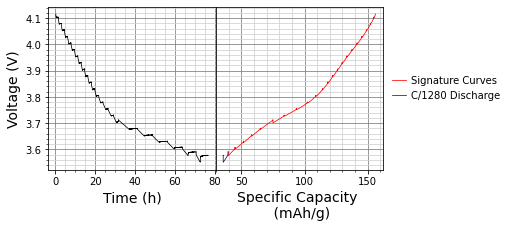

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Discharge\239 NMC811 30C Discharge Parsed.jpg


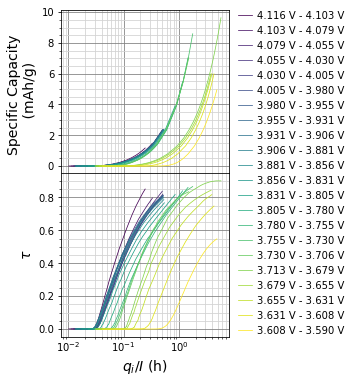

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.116 V - 4.103 V: [-10.409  -0.909   9.5  ]
4.103 V - 4.079 V: [-10.626  -1.114   9.512]
4.079 V - 4.055 V: [-10.698  -1.183   9.515]
4.055 V - 4.030 V: [-10.736  -1.208   9.528]
4.030 V - 4.005 V: [-10.73   -1.197   9.533]
4.005 V - 3.980 V: [-10.717  -1.195   9.522]
3.980 V - 3.955 V: [-10.679  -1.189   9.49 ]
3.955 V - 3.931 V: [-10.653  -1.176   9.477]
3.931 V - 3.906 V: [-10.679  -1.209   9.47 ]
3.906 V - 3.881 V: [-10.703  -1.232   9.471]
3.881 V - 3.856 V: [-10.743  -1.255   9.488]
3.856 V - 3.831 V: [-10.818  -1.295   9.523]
3.831 V - 3.805 V: [-10.9    -1.325   9.575]
3.805 V - 3.780 V: [-11.003  -1.326   9.677]
3.780 V - 3.755 V: [-11.061  -1.275   9.785]
3.755 V - 3.730 V: [-11.022  -1.195   9.827]
3.730 V - 3.706 V: [-10.976  -1.108   9.867]
3.713 V - 3.679 V: [-11.128  -1.083  10.045]
3.679 V - 3.655 V: [-11.276  -1.212  10.065]
3.655 V - 3.631 V: [-11.476  -1.309  10.168]
3.631 V - 3.608 V: [-11.812  -1.433  10.379]
3.60

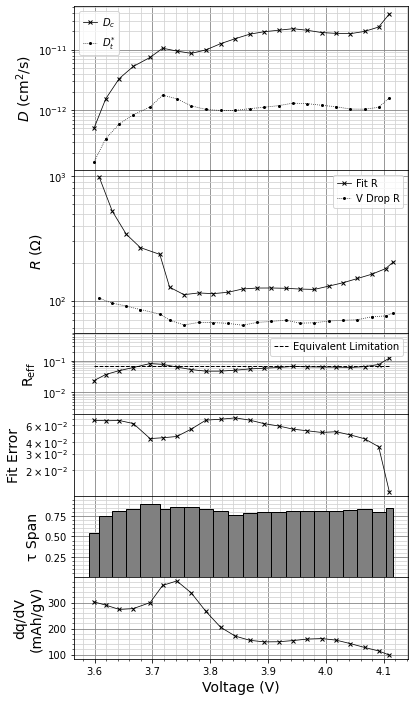

239 NMC811 30C Charge
Working on cell: 239 NMC811 30C
Positive electrode active mass: 0.001317 g
Input cell capacity: 0.000296 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 99
Starting voltage: 3.578 V
Ending voltage: 4.194 V
Found 33 charge or discharge steps in signature curve sequences.
Found 33 signature curves.
Voltage interval labels: ['3.578 V - 3.579 V', '3.579 V - 3.584 V', '3.584 V - 3.594 V', '3.594 V - 3.605 V', '3.605 V - 3.617 V', '3.617 V - 3.627 V', '3.627 V - 3.630 V', '3.630 V - 3.633 V', '3.633 V - 3.657 V', '3.657 V - 3.668 V', '3.668 V - 3.671 V', '3.671 V - 3.688 V', '3.688 V - 3.698 V', '3.696 V - 3.719 V', '3.719 V - 3.745 V', '3.745 V - 3.770 V', '3.770 V - 3.794 V', '3.794 V - 3.819 V', '3.819 V - 3.843 V', '3.843 V - 3.868 V', '3.868 V - 3.892 V', '3.892 V - 3.918 V', '3.918 V - 3.943 V', '3.943 V - 3.968 V', '3.968 V - 3.993 V', '3.993

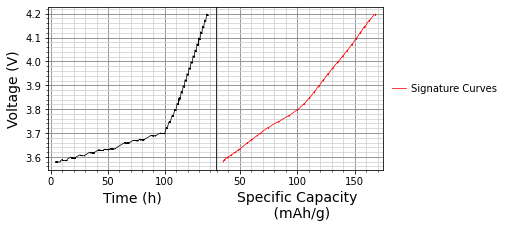

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\239\239 NMC811 30C Charge\239 NMC811 30C Charge Parsed.jpg


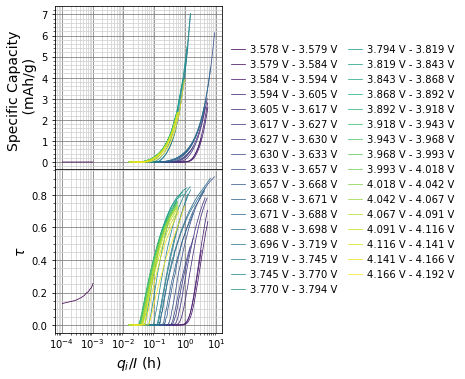

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.578 V - 3.579 V: No fit within Reff bounds
3.579 V - 3.584 V: [-12.405  -1.429  10.976]
3.584 V - 3.594 V: [-12.333  -1.267  11.066]
3.594 V - 3.605 V: [-12.195  -1.153  11.041]
3.605 V - 3.617 V: [-12.042  -1.264  10.778]
3.617 V - 3.627 V: [-11.904  -1.224  10.681]
3.627 V - 3.630 V: [-11.816  -1.213  10.603]
3.630 V - 3.633 V: [-11.743  -1.181  10.562]
3.633 V - 3.657 V: [-11.635  -1.169  10.466]
3.657 V - 3.668 V: [-11.525  -1.19   10.335]
3.668 V - 3.671 V: [-11.44   -1.148  10.292]
3.671 V - 3.688 V: [-11.285  -1.1    10.185]
3.688 V - 3.698 V: [-11.339  -1.167  10.172]
3.696 V - 3.719 V: [-11.138  -0.998  10.14 ]
3.719 V - 3.745 V: [-11.121  -1.006  10.115]
3.745 V - 3.770 V: [-10.958  -0.959   9.999]
3.770 V - 3.794 V: [-10.77   -0.918   9.851]
3.794 V - 3.819 V: [-10.685  -0.97    9.714]
3.819 V - 3.843 V: [-10.681  -1.062   9.619]
3.843 V - 3.868 V: [-10.701  -1.153   9.548]
3.868 V - 3.892 V: [-10.737  -1.215   9.523]
3.89

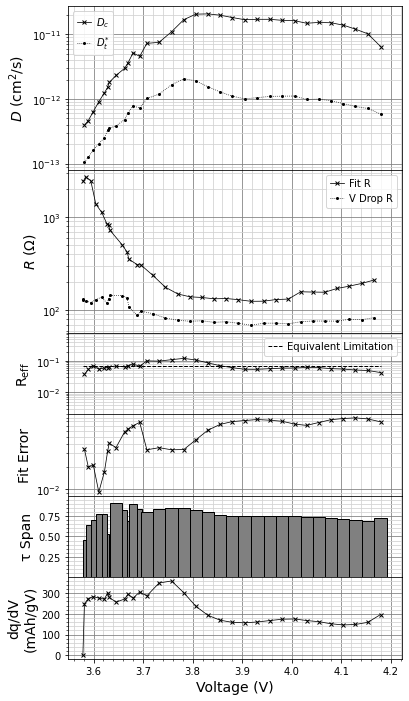

272 NMC811 30C Discharge
Working on cell: 272 NMC811 30C
Positive electrode active mass: 0.001754 g
Input cell capacity: 0.000395 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 96
Starting voltage: 4.181 V
Ending voltage: 3.463 V
Found 32 charge or discharge steps in signature curve sequences.
Found 32 signature curves.
Voltage interval labels: ['4.181 V - 4.172 V', '4.172 V - 4.148 V', '4.148 V - 4.124 V', '4.124 V - 4.101 V', '4.101 V - 4.077 V', '4.077 V - 4.052 V', '4.052 V - 4.028 V', '4.028 V - 4.003 V', '4.003 V - 3.978 V', '3.978 V - 3.954 V', '3.954 V - 3.929 V', '3.929 V - 3.904 V', '3.904 V - 3.879 V', '3.879 V - 3.855 V', '3.855 V - 3.829 V', '3.829 V - 3.804 V', '3.804 V - 3.779 V', '3.779 V - 3.754 V', '3.754 V - 3.729 V', '3.729 V - 3.705 V', '3.712 V - 3.679 V', '3.679 V - 3.655 V', '3.655 V - 3.631 V', '3.631 V - 3.608 V', '3.608 V - 3.589 V', '3.

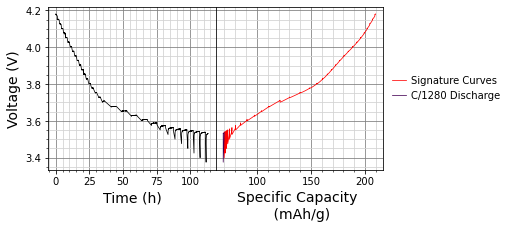

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Discharge\272 NMC811 30C Discharge Parsed.jpg


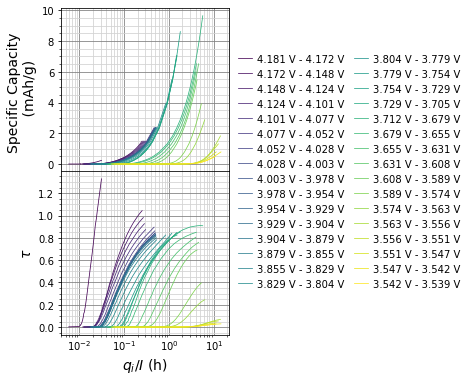

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.181 V - 4.172 V: No fit within Reff bounds
4.172 V - 4.148 V: [-10.14   -0.743   9.398]
4.148 V - 4.124 V: [-10.289  -0.928   9.361]
4.124 V - 4.101 V: [-10.41   -1.045   9.364]
4.101 V - 4.077 V: [-10.524  -1.15    9.374]
4.077 V - 4.052 V: [-10.619  -1.191   9.428]
4.052 V - 4.028 V: [-10.702  -1.239   9.463]
4.028 V - 4.003 V: [-10.717  -1.217   9.5  ]
4.003 V - 3.978 V: [-10.716  -1.206   9.51 ]
3.978 V - 3.954 V: [-10.719  -1.213   9.506]
3.954 V - 3.929 V: [-10.705  -1.217   9.488]
3.929 V - 3.904 V: [-10.707  -1.22    9.486]
3.904 V - 3.879 V: [-10.734  -1.251   9.482]
3.879 V - 3.855 V: [-10.783  -1.297   9.486]
3.855 V - 3.829 V: [-10.847  -1.311   9.536]
3.829 V - 3.804 V: [-10.96   -1.354   9.606]
3.804 V - 3.779 V: [-11.077  -1.357   9.719]
3.779 V - 3.754 V: [-11.154  -1.312   9.842]
3.754 V - 3.729 V: [-11.147  -1.225   9.922]
3.729 V - 3.705 V: [-11.1    -1.143   9.957]
3.712 V - 3.679 V: [-11.169  -1.161  10.008]
3.67

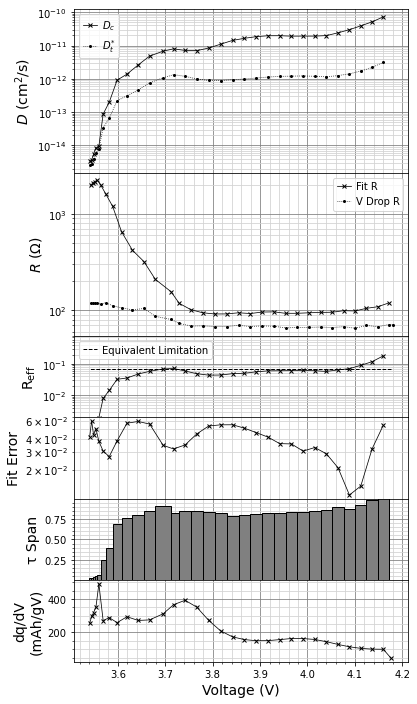

272 NMC811 30C Charge
Working on cell: 272 NMC811 30C
Positive electrode active mass: 0.001754 g
Input cell capacity: 0.000395 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 111
Starting voltage: 3.536 V
Ending voltage: 4.194 V
Found 37 charge or discharge steps in signature curve sequences.
Found 37 signature curves.
Voltage interval labels: ['3.536 V - 3.538 V', '3.538 V - 3.539 V', '3.539 V - 3.544 V', '3.544 V - 3.557 V', '3.557 V - 3.570 V', '3.570 V - 3.582 V', '3.582 V - 3.594 V', '3.594 V - 3.605 V', '3.605 V - 3.616 V', '3.616 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.647 V', '3.647 V - 3.658 V', '3.658 V - 3.668 V', '3.668 V - 3.678 V', '3.678 V - 3.688 V', '3.688 V - 3.698 V', '3.695 V - 3.719 V', '3.719 V - 3.745 V', '3.745 V - 3.770 V', '3.770 V - 3.794 V', '3.794 V - 3.819 V', '3.819 V - 3.843 V', '3.843 V - 3.867 V', '3.867 V - 3.892 V', '3.89

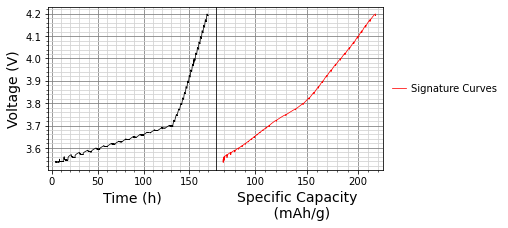

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\272\272 NMC811 30C Charge\272 NMC811 30C Charge Parsed.jpg


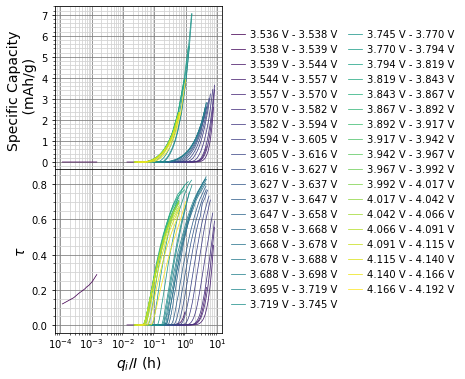

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.536 V - 3.538 V: No fit within Reff bounds
3.538 V - 3.539 V: [-13.329  -3.541   9.787]
3.539 V - 3.544 V: [-12.895  -1.615  11.28 ]
3.544 V - 3.557 V: [-12.709  -1.246  11.462]
3.557 V - 3.570 V: [-12.653  -1.286  11.367]
3.570 V - 3.582 V: [-12.61   -1.318  11.292]
3.582 V - 3.594 V: [-12.481  -1.34   11.141]
3.594 V - 3.605 V: [-12.28   -1.295  10.985]
3.605 V - 3.616 V: [-12.172  -1.319  10.852]
3.616 V - 3.627 V: [-12.004  -1.261  10.742]
3.627 V - 3.637 V: [-11.883  -1.235  10.648]
3.637 V - 3.647 V: [-11.752  -1.192  10.56 ]
3.647 V - 3.658 V: [-11.556  -1.087  10.468]
3.658 V - 3.668 V: [-11.535  -1.132  10.403]
3.668 V - 3.678 V: [-11.568  -1.179  10.389]
3.678 V - 3.688 V: [-11.513  -1.16   10.353]
3.688 V - 3.698 V: [-11.447  -1.119  10.328]
3.695 V - 3.719 V: [-11.307  -1.007  10.3  ]
3.719 V - 3.745 V: [-11.282  -1.015  10.267]
3.745 V - 3.770 V: [-11.102  -0.962  10.141]
3.770 V - 3.794 V: [-10.916  -0.944   9.972]
3.79

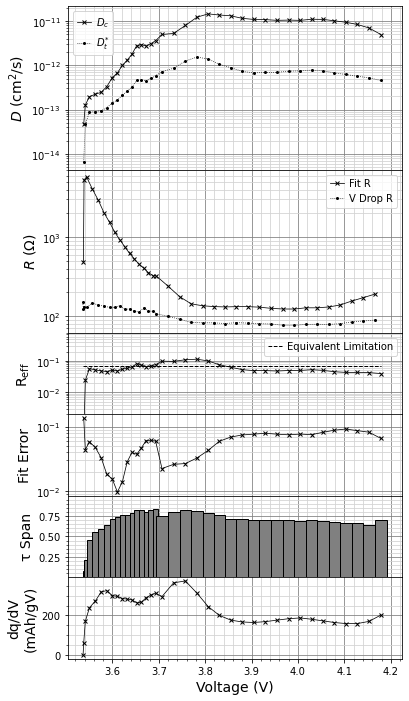

276 NMC811 30C Discharge
Working on cell: 276 NMC811 30C
Positive electrode active mass: 0.0018549999999999999 g
Input cell capacity: 0.000417 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 93
Starting voltage: 4.167 V
Ending voltage: 3.453 V
Found 31 charge or discharge steps in signature curve sequences.
Found 31 signature curves.
Voltage interval labels: ['4.167 V - 4.148 V', '4.148 V - 4.124 V', '4.124 V - 4.101 V', '4.101 V - 4.077 V', '4.077 V - 4.052 V', '4.052 V - 4.028 V', '4.028 V - 4.003 V', '4.003 V - 3.979 V', '3.979 V - 3.954 V', '3.954 V - 3.929 V', '3.929 V - 3.904 V', '3.904 V - 3.879 V', '3.879 V - 3.854 V', '3.854 V - 3.829 V', '3.829 V - 3.804 V', '3.804 V - 3.779 V', '3.779 V - 3.754 V', '3.754 V - 3.729 V', '3.729 V - 3.705 V', '3.708 V - 3.678 V', '3.678 V - 3.654 V', '3.654 V - 3.630 V', '3.630 V - 3.606 V', '3.606 V - 3.587 V', '3.587 V - 

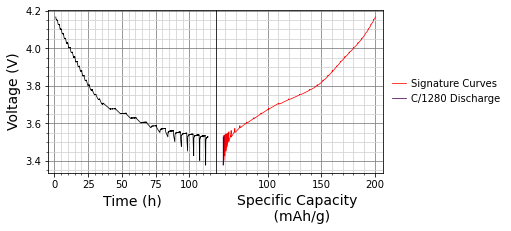

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Discharge\276 NMC811 30C Discharge Parsed.jpg


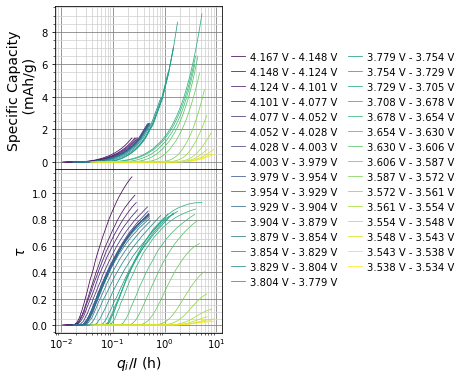

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.167 V - 4.148 V: [-9.948 -0.613  9.335]
4.148 V - 4.124 V: [-10.272  -0.937   9.335]
4.124 V - 4.101 V: [-10.38   -1.044   9.337]
4.101 V - 4.077 V: [-10.499  -1.151   9.348]
4.077 V - 4.052 V: [-10.603  -1.215   9.389]
4.052 V - 4.028 V: [-10.66  -1.22   9.44]
4.028 V - 4.003 V: [-10.697  -1.233   9.464]
4.003 V - 3.979 V: [-10.699  -1.213   9.486]
3.979 V - 3.954 V: [-10.673  -1.194   9.479]
3.954 V - 3.929 V: [-10.672  -1.218   9.454]
3.929 V - 3.904 V: [-10.678  -1.234   9.444]
3.904 V - 3.879 V: [-10.695  -1.251   9.444]
3.879 V - 3.854 V: [-10.743  -1.296   9.447]
3.854 V - 3.829 V: [-10.813  -1.31    9.503]
3.829 V - 3.804 V: [-10.91   -1.344   9.566]
3.804 V - 3.779 V: [-11.04   -1.373   9.667]
3.779 V - 3.754 V: [-11.114  -1.314   9.801]
3.754 V - 3.729 V: [-11.086  -1.205   9.882]
3.729 V - 3.705 V: [-11.019  -1.098   9.921]
3.708 V - 3.678 V: [-11.032  -1.114   9.918]
3.678 V - 3.654 V: [-11.207  -1.25    9.957]
3.654 V - 

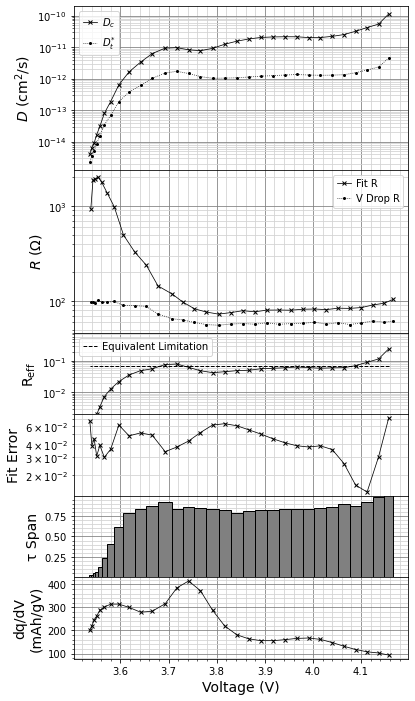

276 NMC811 30C Charge
Working on cell: 276 NMC811 30C
Positive electrode active mass: 0.0018549999999999999 g
Input cell capacity: 0.000417 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 111
Starting voltage: 3.531 V
Ending voltage: 4.192 V
Found 37 charge or discharge steps in signature curve sequences.
Found 37 signature curves.
Voltage interval labels: ['3.531 V - 3.531 V', '3.531 V - 3.534 V', '3.534 V - 3.544 V', '3.544 V - 3.557 V', '3.557 V - 3.570 V', '3.570 V - 3.582 V', '3.582 V - 3.594 V', '3.594 V - 3.600 V', '3.600 V - 3.616 V', '3.616 V - 3.626 V', '3.626 V - 3.637 V', '3.637 V - 3.647 V', '3.647 V - 3.657 V', '3.657 V - 3.656 V', '3.656 V - 3.678 V', '3.678 V - 3.688 V', '3.688 V - 3.698 V', '3.693 V - 3.720 V', '3.720 V - 3.746 V', '3.746 V - 3.771 V', '3.771 V - 3.795 V', '3.795 V - 3.820 V', '3.820 V - 3.844 V', '3.844 V - 3.869 V', '3.869 V - 3.

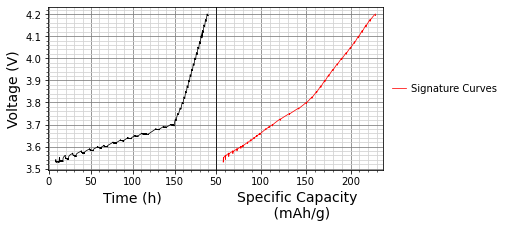

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\276\276 NMC811 30C Charge\276 NMC811 30C Charge Parsed.jpg


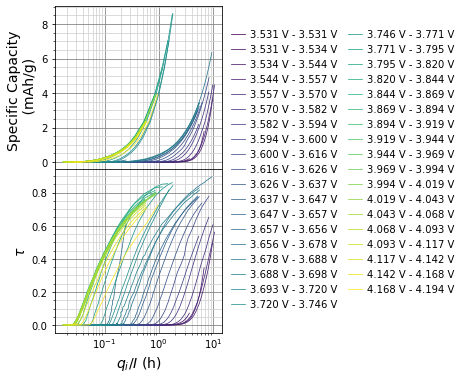

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.531 V - 3.531 V: No fit within Reff bounds
3.531 V - 3.534 V: [-13.36   -2.181  11.179]
3.534 V - 3.544 V: [-12.838  -1.402  11.436]
3.544 V - 3.557 V: [-12.81   -1.332  11.479]
3.557 V - 3.570 V: [-12.753  -1.31   11.443]
3.570 V - 3.582 V: [-12.678  -1.378  11.3  ]
3.582 V - 3.594 V: [-12.526  -1.368  11.158]
3.594 V - 3.600 V: [-12.508  -1.483  11.025]
3.600 V - 3.616 V: [-12.304  -1.385  10.919]
3.616 V - 3.626 V: [-12.153  -1.37   10.783]
3.626 V - 3.637 V: [-11.972  -1.34   10.632]
3.637 V - 3.647 V: [-11.849  -1.325  10.524]
3.647 V - 3.657 V: [-11.78   -1.294  10.485]
3.657 V - 3.656 V: [-10.28   -0.166  10.114]
3.656 V - 3.678 V: [-11.622  -1.273  10.35 ]
3.678 V - 3.688 V: [-11.594  -1.293  10.301]
3.688 V - 3.698 V: [-11.467  -1.233  10.235]
3.693 V - 3.720 V: [-11.286  -1.123  10.164]
3.720 V - 3.746 V: [-11.228  -1.128  10.1  ]
3.746 V - 3.771 V: [-11.022  -1.074   9.948]
3.771 V - 3.795 V: [-10.8    -1.033   9.767]
3.79

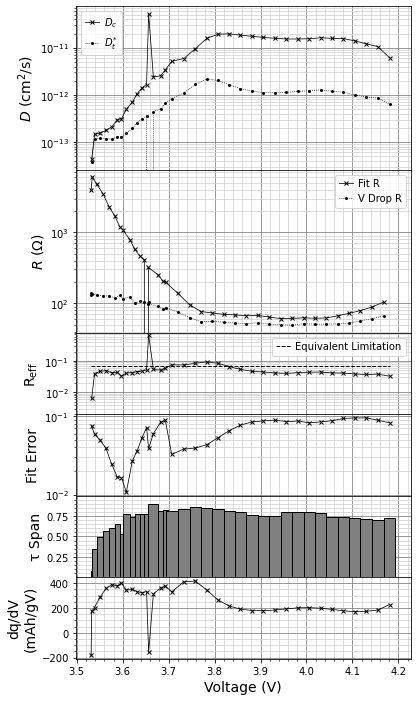

266 NM9505 30C Discharge
Working on cell: 266 NM9505 30C
Positive electrode active mass: 0.002477 g
Input cell capacity: 0.000557 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 174
Starting voltage: 4.185 V
Ending voltage: 3.466 V
Found 58 charge or discharge steps in signature curve sequences.
Found 58 signature curves.
Voltage interval labels: ['4.185 V - 4.179 V', '4.179 V - 4.165 V', '4.165 V - 4.152 V', '4.152 V - 4.139 V', '4.139 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.089 V', '4.089 V - 4.077 V', '4.077 V - 4.064 V', '4.064 V - 4.052 V', '4.052 V - 4.039 V', '4.039 V - 4.027 V', '4.027 V - 4.014 V', '4.014 V - 4.002 V', '4.002 V - 3.989 V', '3.989 V - 3.977 V', '3.977 V - 3.964 V', '3.964 V - 3.952 V', '3.952 V - 3.939 V', '3.939 V - 3.927 V', '3.927 V - 3.914 V', '3.914 V - 3.902 V', '3.902 V - 3.889 V', '3.889 V - 3.877 V', '3

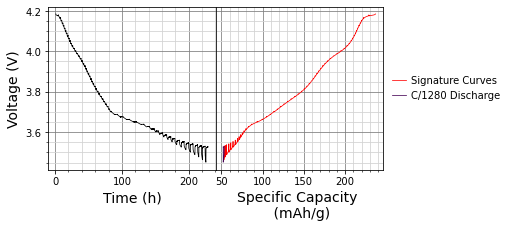

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Discharge\266 NM9505 30C Discharge Parsed.jpg


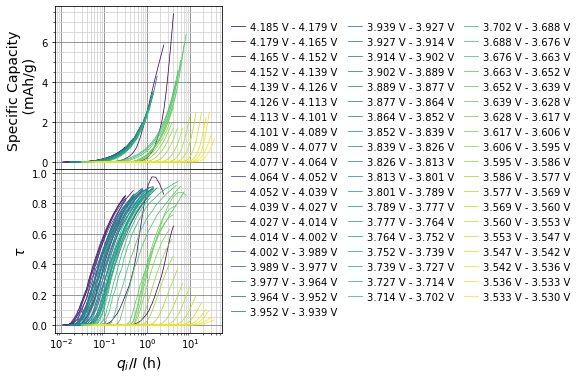

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.185 V - 4.179 V: [-12.679  -1.77   10.908]
4.179 V - 4.165 V: [-11.842  -1.526  10.315]
4.165 V - 4.152 V: [-11.139  -1.431   9.708]
4.152 V - 4.139 V: [-10.993  -1.391   9.602]
4.139 V - 4.126 V: [-10.927  -1.399   9.528]
4.126 V - 4.113 V: [-10.918  -1.45    9.468]
4.113 V - 4.101 V: [-10.895  -1.453   9.442]
4.101 V - 4.089 V: [-10.912  -1.478   9.434]
4.089 V - 4.077 V: [-10.945  -1.48    9.464]
4.077 V - 4.064 V: [-11.016  -1.523   9.494]
4.064 V - 4.052 V: [-11.056  -1.499   9.557]
4.052 V - 4.039 V: [-11.138  -1.521   9.618]
4.039 V - 4.027 V: [-11.218  -1.527   9.691]
4.027 V - 4.014 V: [-11.321  -1.547   9.774]
4.014 V - 4.002 V: [-11.385  -1.51    9.875]
4.002 V - 3.989 V: [-11.433  -1.496   9.937]
3.989 V - 3.977 V: [-11.333  -1.41    9.923]
3.977 V - 3.964 V: [-11.23   -1.384   9.846]
3.964 V - 3.952 V: [-11.186  -1.391   9.795]
3.952 V - 3.939 V: [-11.101  -1.349   9.752]
3.939 V - 3.927 V: [-11.085  -1.398   9.687]
3.92

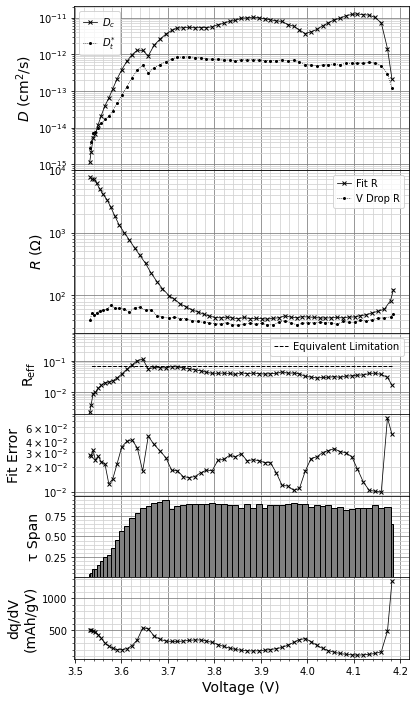

266 NM9505 30C Charge
Working on cell: 266 NM9505 30C
Positive electrode active mass: 0.002477 g
Input cell capacity: 0.000557 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.531 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.531 V - 3.531 V', '3.531 V - 3.532 V', '3.532 V - 3.540 V', '3.540 V - 3.553 V', '3.553 V - 3.565 V', '3.565 V - 3.577 V', '3.577 V - 3.590 V', '3.590 V - 3.604 V', '3.604 V - 3.616 V', '3.616 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.669 V', '3.669 V - 3.679 V', '3.679 V - 3.689 V', '3.689 V - 3.699 V', '3.699 V - 3.709 V', '3.709 V - 3.723 V', '3.723 V - 3.735 V', '3.735 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 3.798 V', '3.79

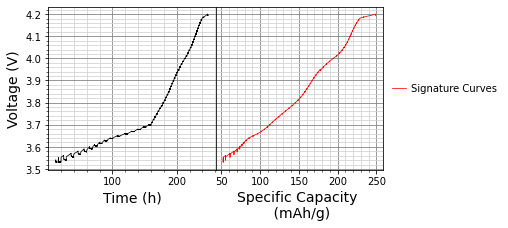

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Charge\266 NM9505 30C Charge Parsed.jpg


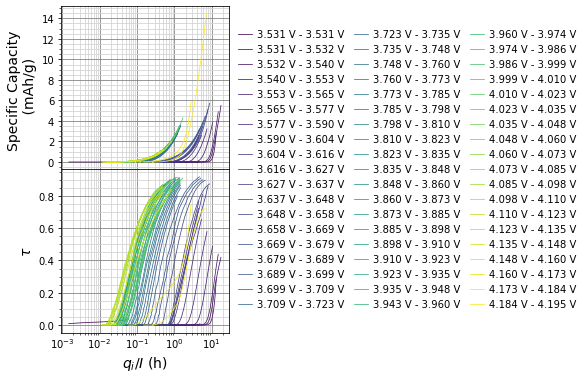

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.531 V - 3.531 V: No fit within Reff bounds
3.531 V - 3.532 V: [-14.958  -4.588  10.371]
3.532 V - 3.540 V: [-12.674  -0.428  12.246]
3.540 V - 3.553 V: [-12.972  -0.815  12.157]
3.553 V - 3.565 V: [-12.907  -0.805  12.102]
3.565 V - 3.577 V: [-12.87   -1.038  11.832]
3.577 V - 3.590 V: [-12.642  -1.054  11.588]
3.590 V - 3.604 V: [-12.418  -1.056  11.362]
3.604 V - 3.616 V: [-12.282  -1.098  11.184]
3.616 V - 3.627 V: [-12.22   -1.104  11.116]
3.627 V - 3.637 V: [-12.269  -1.123  11.145]
3.637 V - 3.648 V: [-12.343  -1.215  11.128]
3.648 V - 3.658 V: [-12.054  -0.938  11.116]
3.658 V - 3.669 V: [-11.752  -0.809  10.943]
3.669 V - 3.679 V: [-11.663  -0.88   10.784]
3.679 V - 3.689 V: [-11.695  -1.025  10.67 ]
3.689 V - 3.699 V: [-11.514  -0.944  10.57 ]
3.699 V - 3.709 V: [-11.399  -0.929  10.471]
3.709 V - 3.723 V: [-11.374  -0.975  10.399]
3.723 V - 3.735 V: [-11.347  -1.027  10.319]
3.735 V - 3.748 V: [-11.296  -1.049  10.246]
3.74

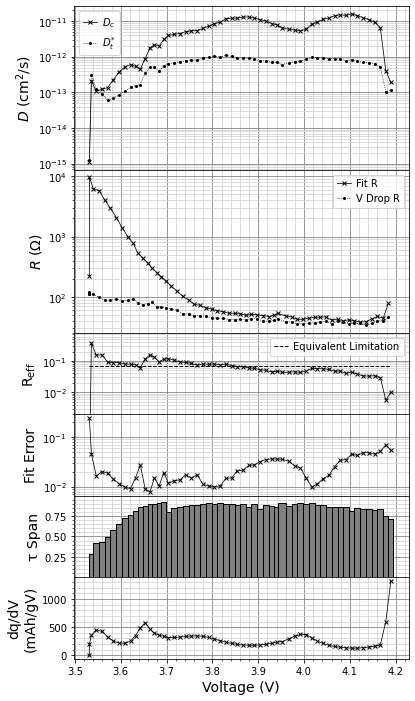

269 NM9505 30C Discharge
Working on cell: 269 NM9505 30C
Positive electrode active mass: 0.002367 g
Input cell capacity: 0.000533 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 177
Starting voltage: 4.185 V
Ending voltage: 3.457 V
Found 59 charge or discharge steps in signature curve sequences.
Found 59 signature curves.
Voltage interval labels: ['4.185 V - 4.179 V', '4.179 V - 4.165 V', '4.165 V - 4.151 V', '4.151 V - 4.138 V', '4.138 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.088 V', '4.088 V - 4.076 V', '4.076 V - 4.063 V', '4.063 V - 4.051 V', '4.051 V - 4.038 V', '4.038 V - 4.026 V', '4.026 V - 4.013 V', '4.013 V - 4.001 V', '4.001 V - 3.988 V', '3.988 V - 3.977 V', '3.977 V - 3.964 V', '3.964 V - 3.952 V', '3.951 V - 3.939 V', '3.939 V - 3.927 V', '3.927 V - 3.914 V', '3.914 V - 3.901 V', '3.901 V - 3.888 V', '3.888 V - 3.876 V', '3

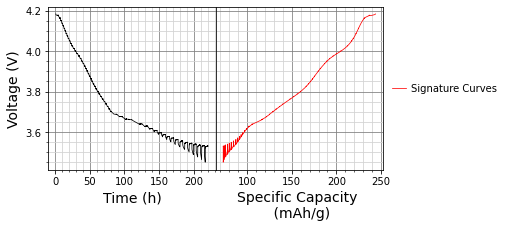

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Discharge\269 NM9505 30C Discharge Parsed.jpg


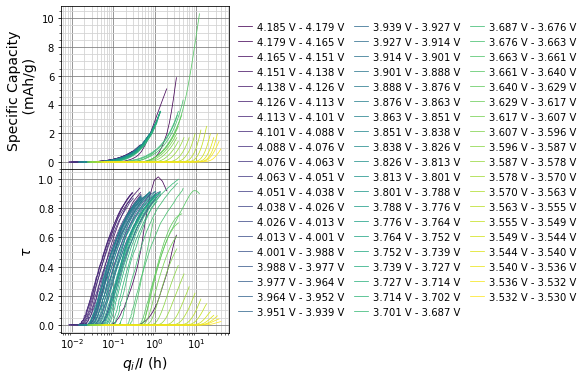

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.185 V - 4.179 V: [-12.624  -1.77   10.854]
4.179 V - 4.165 V: [-11.653  -1.406  10.248]
4.165 V - 4.151 V: [-10.947  -1.253   9.694]
4.151 V - 4.138 V: [-10.811  -1.228   9.583]
4.138 V - 4.126 V: [-10.726  -1.202   9.524]
4.126 V - 4.113 V: [-10.713  -1.245   9.468]
4.113 V - 4.101 V: [-10.695  -1.238   9.457]
4.101 V - 4.088 V: [-10.743  -1.305   9.437]
4.088 V - 4.076 V: [-10.777  -1.287   9.491]
4.076 V - 4.063 V: [-10.882  -1.354   9.528]
4.063 V - 4.051 V: [-10.905  -1.331   9.574]
4.051 V - 4.038 V: [-11.005  -1.362   9.644]
4.038 V - 4.026 V: [-11.098  -1.363   9.735]
4.026 V - 4.013 V: [-11.194  -1.374   9.82 ]
4.013 V - 4.001 V: [-11.312  -1.38    9.932]
4.001 V - 3.988 V: [-11.333  -1.372   9.961]
3.988 V - 3.977 V: [-11.193  -1.232   9.961]
3.977 V - 3.964 V: [-11.109  -1.224   9.886]
3.964 V - 3.952 V: [-11.051  -1.233   9.818]
3.951 V - 3.939 V: [-10.982  -1.213   9.77 ]
3.939 V - 3.927 V: [-10.938  -1.216   9.722]
3.92

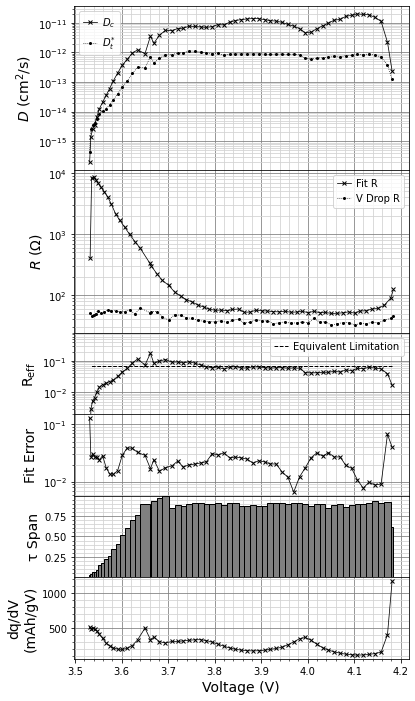

269 NM9505 30C Charge
Working on cell: 269 NM9505 30C
Positive electrode active mass: 0.002367 g
Input cell capacity: 0.000533 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.534 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.534 V - 3.534 V', '3.534 V - 3.534 V', '3.534 V - 3.538 V', '3.538 V - 3.553 V', '3.553 V - 3.564 V', '3.564 V - 3.577 V', '3.577 V - 3.590 V', '3.590 V - 3.603 V', '3.603 V - 3.615 V', '3.615 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.669 V', '3.669 V - 3.679 V', '3.679 V - 3.689 V', '3.689 V - 3.699 V', '3.699 V - 3.709 V', '3.709 V - 3.722 V', '3.722 V - 3.735 V', '3.735 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 3.798 V', '3.79

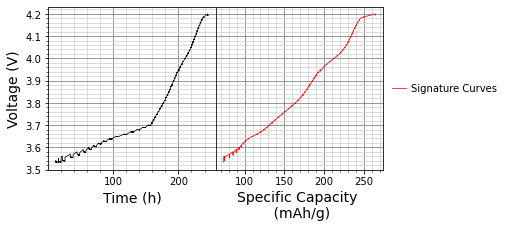

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Charge\269 NM9505 30C Charge Parsed.jpg


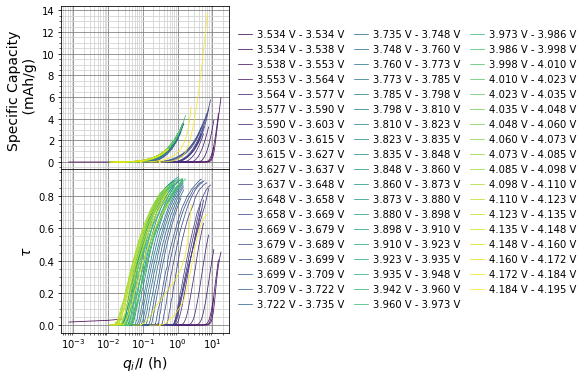

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.534 V - 3.534 V: No fit within Reff bounds
3.534 V - 3.538 V: [-12.993  -0.83   12.163]
3.538 V - 3.553 V: [-12.604  -0.369  12.235]
3.553 V - 3.564 V: [-12.932  -0.804  12.128]
3.564 V - 3.577 V: [-12.892  -1.019  11.873]
3.577 V - 3.590 V: [-12.648  -1.003  11.645]
3.590 V - 3.603 V: [-12.432  -1.008  11.424]
3.603 V - 3.615 V: [-12.296  -1.073  11.224]
3.615 V - 3.627 V: [-12.236  -1.085  11.152]
3.627 V - 3.637 V: [-12.327  -1.196  11.131]
3.637 V - 3.648 V: [-12.309  -1.127  11.182]
3.648 V - 3.658 V: [-12.049  -0.89   11.159]
3.658 V - 3.669 V: [-11.739  -0.775  10.965]
3.669 V - 3.679 V: [-11.615  -0.789  10.825]
3.679 V - 3.689 V: [-11.56   -0.859  10.701]
3.689 V - 3.699 V: [-11.499  -0.868  10.631]
3.699 V - 3.709 V: [-11.363  -0.848  10.514]
3.709 V - 3.722 V: [-11.332  -0.886  10.446]
3.722 V - 3.735 V: [-11.274  -0.909  10.365]
3.735 V - 3.748 V: [-11.223  -0.932  10.291]
3.748 V - 3.760 V: [-11.185  -0.955  10.231]
3.76

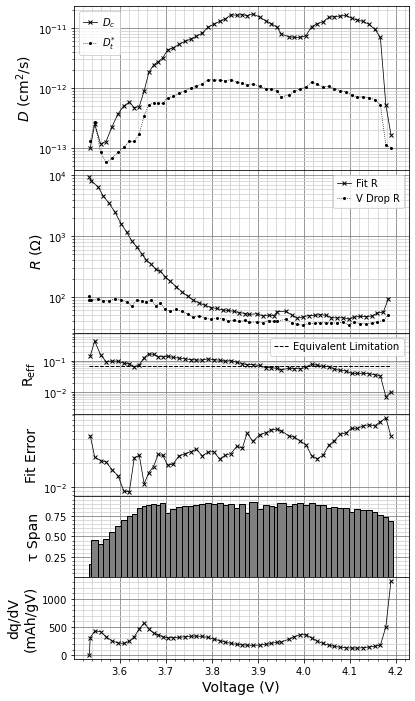

270 NM9505 30C Discharge
Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.000485 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 177
Starting voltage: 4.184 V
Ending voltage: 3.455 V
Found 59 charge or discharge steps in signature curve sequences.
Found 59 signature curves.
Voltage interval labels: ['4.184 V - 4.178 V', '4.178 V - 4.164 V', '4.164 V - 4.151 V', '4.151 V - 4.138 V', '4.138 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.088 V', '4.088 V - 4.076 V', '4.076 V - 4.063 V', '4.063 V - 4.051 V', '4.051 V - 4.038 V', '4.038 V - 4.026 V', '4.026 V - 4.013 V', '4.013 V - 4.001 V', '4.001 V - 3.988 V', '3.988 V - 3.976 V', '3.976 V - 3.963 V', '3.963 V - 3.951 V', '3.951 V - 3.938 V', '3.938 V - 3.926 V', '3.926 V - 3.913 V', '3.913 V - 3.901 V', '3.901 V - 3.888 V', '3.888 V - 3.876 V', '3

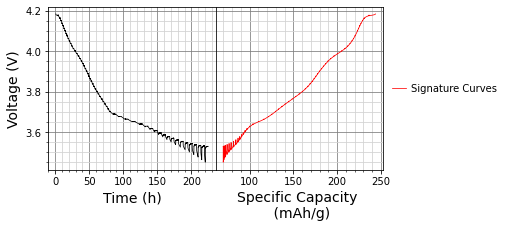

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge\270 NM9505 30C Discharge Parsed.jpg


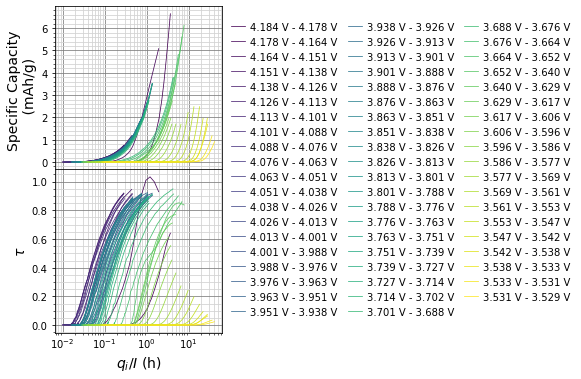

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.184 V - 4.178 V: [-12.627  -1.773  10.854]
4.178 V - 4.164 V: [-11.634  -1.408  10.226]
4.164 V - 4.151 V: [-10.889  -1.221   9.668]
4.151 V - 4.138 V: [-10.764  -1.159   9.605]
4.138 V - 4.126 V: [-10.649  -1.11    9.54 ]
4.126 V - 4.113 V: [-10.635  -1.151   9.484]
4.113 V - 4.101 V: [-10.67   -1.208   9.463]
4.101 V - 4.088 V: [-10.683  -1.216   9.467]
4.088 V - 4.076 V: [-10.721  -1.228   9.493]
4.076 V - 4.063 V: [-10.813  -1.285   9.528]
4.063 V - 4.051 V: [-10.823  -1.214   9.609]
4.051 V - 4.038 V: [-10.938  -1.264   9.675]
4.038 V - 4.026 V: [-11.029  -1.306   9.723]
4.026 V - 4.013 V: [-11.146  -1.31    9.836]
4.013 V - 4.001 V: [-11.234  -1.315   9.919]
4.001 V - 3.988 V: [-11.241  -1.259   9.982]
3.988 V - 3.976 V: [-11.153  -1.186   9.967]
3.976 V - 3.963 V: [-11.03   -1.119   9.912]
3.963 V - 3.951 V: [-10.974  -1.15    9.825]
3.951 V - 3.938 V: [-10.908  -1.13    9.778]
3.938 V - 3.926 V: [-10.891  -1.148   9.742]
3.92

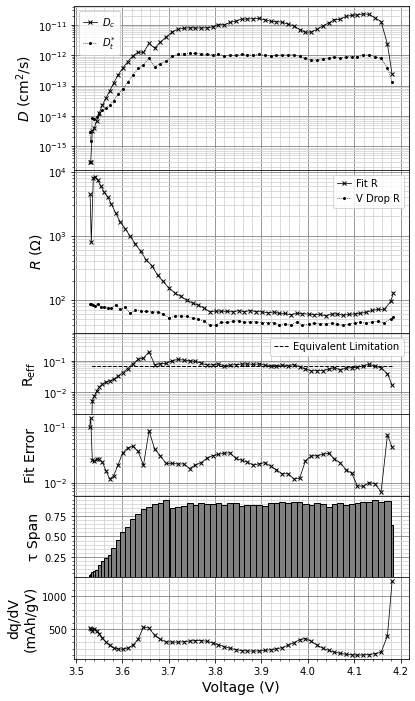

270 NM9505 30C Charge
Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.000485 Ah
3-electrode data detected. Using working potential for calculations and complete cell potential for labelling.
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.532 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.532 V - 3.532 V', '3.532 V - 3.532 V', '3.532 V - 3.538 V', '3.538 V - 3.552 V', '3.552 V - 3.563 V', '3.563 V - 3.576 V', '3.576 V - 3.589 V', '3.589 V - 3.602 V', '3.602 V - 3.615 V', '3.615 V - 3.626 V', '3.626 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.668 V', '3.668 V - 3.678 V', '3.678 V - 3.688 V', '3.688 V - 3.699 V', '3.698 V - 3.709 V', '3.709 V - 3.722 V', '3.722 V - 3.734 V', '3.734 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 3.798 V', '3.79

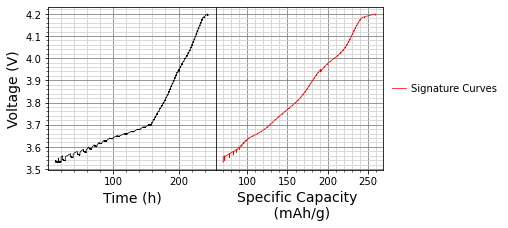

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Charge\270 NM9505 30C Charge Parsed.jpg


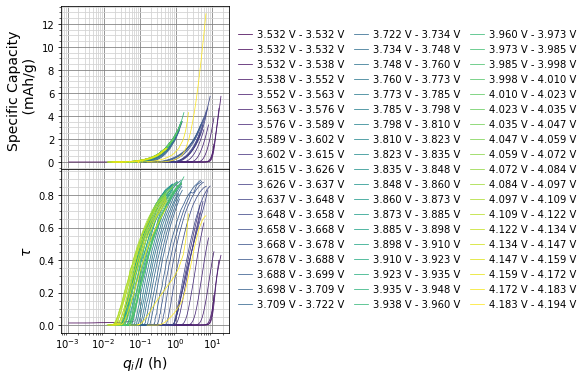

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.532 V - 3.532 V: No fit within Reff bounds
3.532 V - 3.532 V: No fit within Reff bounds
3.532 V - 3.538 V: [-12.808  -0.599  12.209]
3.538 V - 3.552 V: [-12.698  -0.461  12.236]
3.552 V - 3.563 V: [-12.923  -0.754  12.169]
3.563 V - 3.576 V: [-12.92   -1.016  11.904]
3.576 V - 3.589 V: [-12.683  -0.995  11.688]
3.589 V - 3.602 V: [-12.453  -0.976  11.477]
3.602 V - 3.615 V: [-12.31   -1.048  11.262]
3.615 V - 3.626 V: [-12.263  -1.074  11.189]
3.626 V - 3.637 V: [-12.351  -1.165  11.186]
3.637 V - 3.648 V: [-12.335  -1.133  11.202]
3.648 V - 3.658 V: [-12.093  -0.884  11.209]
3.658 V - 3.668 V: [-11.816  -0.8    11.016]
3.668 V - 3.678 V: [-11.646  -0.763  10.884]
3.678 V - 3.688 V: [-11.595  -0.825  10.771]
3.688 V - 3.699 V: [-11.561  -0.898  10.662]
3.698 V - 3.709 V: [-11.394  -0.843  10.551]
3.709 V - 3.722 V: [-11.355  -0.877  10.478]
3.722 V - 3.734 V: [-11.298  -0.894  10.404]
3.734 V - 3.748 V: [-11.285  -0.957  10.328]
3.74

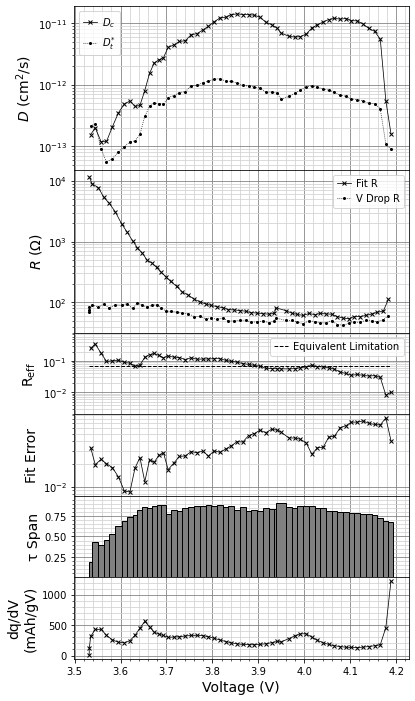

266 NM9505 30C Discharge-2e
Working on cell: 266 NM9505 30C
Positive electrode active mass: 0.002477 g
Input cell capacity: 0.000557 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 174
Starting voltage: 4.185 V
Ending voltage: 3.466 V
Found 58 charge or discharge steps in signature curve sequences.
Found 58 signature curves.
Voltage interval labels: ['4.185 V - 4.179 V', '4.179 V - 4.165 V', '4.165 V - 4.152 V', '4.152 V - 4.139 V', '4.139 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.089 V', '4.089 V - 4.077 V', '4.077 V - 4.064 V', '4.064 V - 4.052 V', '4.052 V - 4.039 V', '4.039 V - 4.027 V', '4.027 V - 4.014 V', '4.014 V - 4.002 V', '4.002 V - 3.989 V', '3.989 V - 3.977 V', '3.977 V - 3.964 V', '3.964 V - 3.952 V', '3.952 V - 3.939 V', '3.939 V - 3.927 V', '3.927 V - 3.914 V', '3.914 V - 3.902 V', '3.902 V - 3.889 V', '3.889 V

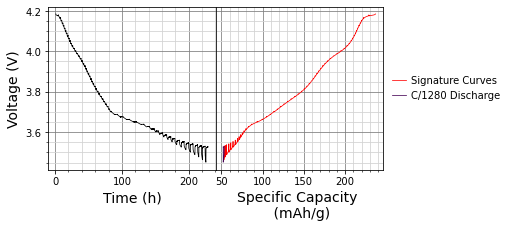

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Discharge-2e\266 NM9505 30C Discharge-2e Parsed.jpg


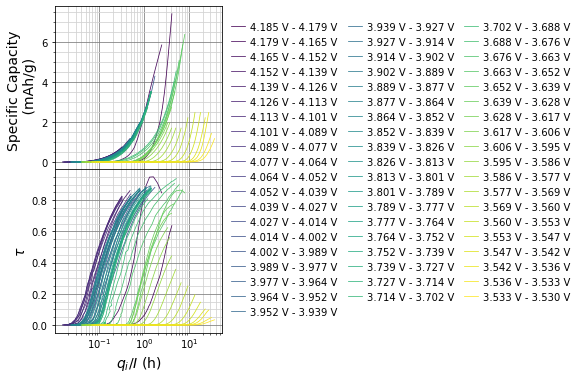

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.185 V - 4.179 V: [-12.674  -1.7    10.974]
4.179 V - 4.165 V: [-11.835  -1.389  10.445]
4.165 V - 4.152 V: [-11.229  -1.398   9.832]
4.152 V - 4.139 V: [-11.091  -1.358   9.734]
4.139 V - 4.126 V: [-11.038  -1.369   9.669]
4.126 V - 4.113 V: [-11.043  -1.433   9.61 ]
4.113 V - 4.101 V: [-11.015  -1.418   9.597]
4.101 V - 4.089 V: [-11.034  -1.44    9.593]
4.089 V - 4.077 V: [-11.067  -1.442   9.624]
4.077 V - 4.064 V: [-11.156  -1.5     9.656]
4.064 V - 4.052 V: [-11.193  -1.476   9.717]
4.052 V - 4.039 V: [-11.269  -1.483   9.786]
4.039 V - 4.027 V: [-11.345  -1.475   9.87 ]
4.027 V - 4.014 V: [-11.443  -1.484   9.959]
4.014 V - 4.002 V: [-11.498  -1.44   10.058]
4.002 V - 3.989 V: [-11.558  -1.437  10.121]
3.989 V - 3.977 V: [-11.452  -1.34   10.113]
3.977 V - 3.964 V: [-11.356  -1.302  10.054]
3.964 V - 3.952 V: [-11.329  -1.357   9.972]
3.952 V - 3.939 V: [-11.254  -1.328   9.926]
3.939 V - 3.927 V: [-11.225  -1.343   9.882]
3.92

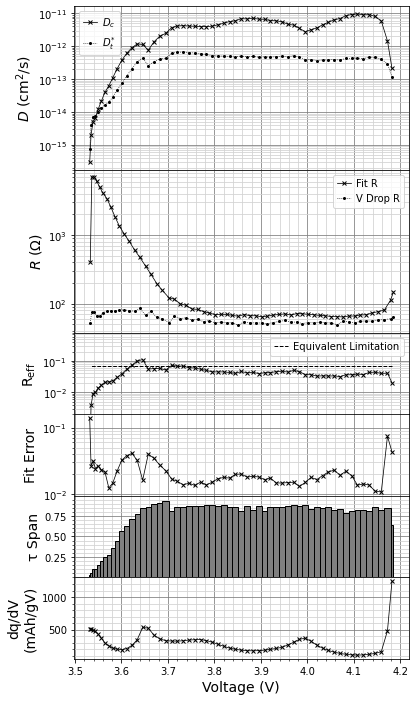

266 NM9505 30C Charge-2e
Working on cell: 266 NM9505 30C
Positive electrode active mass: 0.002477 g
Input cell capacity: 0.000557 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.531 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.531 V - 3.531 V', '3.531 V - 3.532 V', '3.532 V - 3.540 V', '3.540 V - 3.553 V', '3.553 V - 3.565 V', '3.565 V - 3.577 V', '3.577 V - 3.590 V', '3.590 V - 3.604 V', '3.604 V - 3.616 V', '3.616 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.669 V', '3.669 V - 3.679 V', '3.679 V - 3.689 V', '3.689 V - 3.699 V', '3.699 V - 3.709 V', '3.709 V - 3.723 V', '3.723 V - 3.735 V', '3.735 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 

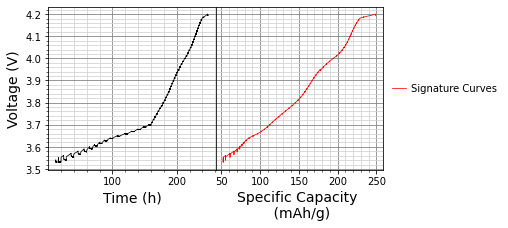

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\266\266 NM9505 30C Charge-2e\266 NM9505 30C Charge-2e Parsed.jpg


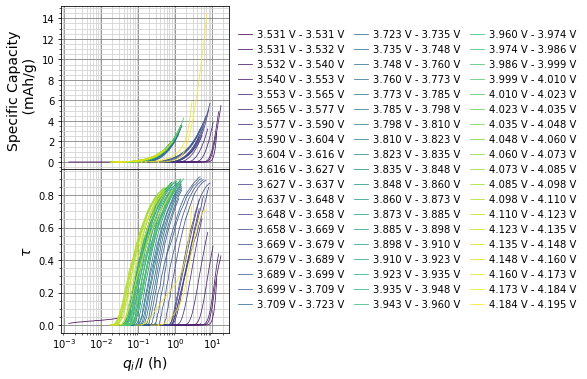

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.531 V - 3.531 V: No fit within Reff bounds
3.531 V - 3.532 V: [-14.942  -4.159  10.783]
3.532 V - 3.540 V: [-12.687  -0.436  12.251]
3.540 V - 3.553 V: [-12.955  -0.808  12.147]
3.553 V - 3.565 V: [-12.908  -0.805  12.103]
3.565 V - 3.577 V: [-12.874  -1.039  11.835]
3.577 V - 3.590 V: [-12.664  -1.068  11.596]
3.590 V - 3.604 V: [-12.416  -1.05   11.366]
3.604 V - 3.616 V: [-12.3    -1.108  11.192]
3.616 V - 3.627 V: [-12.209  -1.088  11.12 ]
3.627 V - 3.637 V: [-12.294  -1.128  11.166]
3.637 V - 3.648 V: [-12.366  -1.201  11.165]
3.648 V - 3.658 V: [-12.062  -0.924  11.138]
3.658 V - 3.669 V: [-11.738  -0.759  10.979]
3.669 V - 3.679 V: [-11.672  -0.838  10.834]
3.679 V - 3.689 V: [-11.518  -0.786  10.732]
3.689 V - 3.699 V: [-11.527  -0.894  10.633]
3.699 V - 3.709 V: [-11.412  -0.861  10.551]
3.709 V - 3.723 V: [-11.402  -0.91   10.492]
3.723 V - 3.735 V: [-11.395  -0.973  10.423]
3.735 V - 3.748 V: [-11.354  -0.981  10.373]
3.74

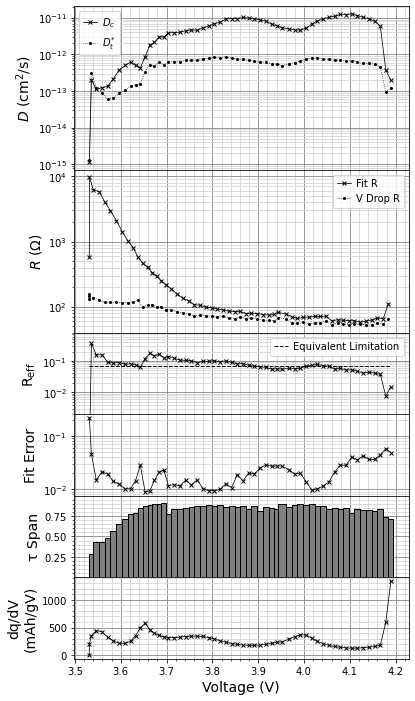

269 NM9505 30C Discharge-2e
Working on cell: 269 NM9505 30C
Positive electrode active mass: 0.002367 g
Input cell capacity: 0.000533 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 177
Starting voltage: 4.185 V
Ending voltage: 3.457 V
Found 59 charge or discharge steps in signature curve sequences.
Found 59 signature curves.
Voltage interval labels: ['4.185 V - 4.179 V', '4.179 V - 4.165 V', '4.165 V - 4.151 V', '4.151 V - 4.138 V', '4.138 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.088 V', '4.088 V - 4.076 V', '4.076 V - 4.063 V', '4.063 V - 4.051 V', '4.051 V - 4.038 V', '4.038 V - 4.026 V', '4.026 V - 4.013 V', '4.013 V - 4.001 V', '4.001 V - 3.988 V', '3.988 V - 3.977 V', '3.977 V - 3.964 V', '3.964 V - 3.952 V', '3.951 V - 3.939 V', '3.939 V - 3.927 V', '3.927 V - 3.914 V', '3.914 V - 3.901 V', '3.901 V - 3.888 V', '3.888 V

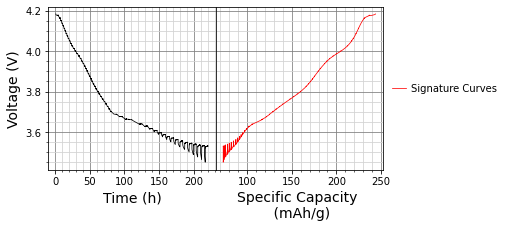

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Discharge-2e\269 NM9505 30C Discharge-2e Parsed.jpg


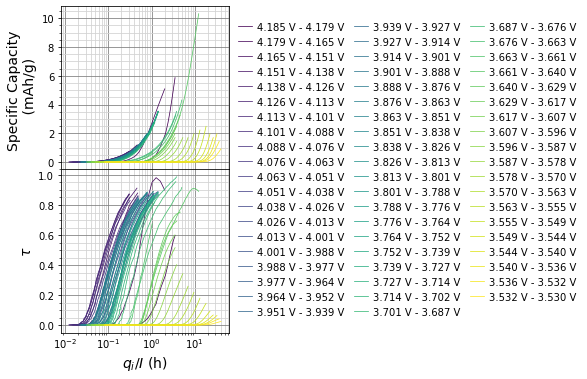

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.185 V - 4.179 V: [-12.638  -1.702  10.935]
4.179 V - 4.165 V: [-11.693  -1.328  10.365]
4.165 V - 4.151 V: [-11.107  -1.308   9.799]
4.151 V - 4.138 V: [-10.98   -1.283   9.697]
4.138 V - 4.126 V: [-10.892  -1.238   9.654]
4.126 V - 4.113 V: [-10.889  -1.295   9.595]
4.113 V - 4.101 V: [-10.875  -1.284   9.591]
4.101 V - 4.088 V: [-10.944  -1.371   9.572]
4.088 V - 4.076 V: [-10.974  -1.345   9.63 ]
4.076 V - 4.063 V: [-11.073  -1.401   9.673]
4.063 V - 4.051 V: [-11.102  -1.38    9.722]
4.051 V - 4.038 V: [-11.21   -1.434   9.776]
4.038 V - 4.026 V: [-11.289  -1.396   9.893]
4.026 V - 4.013 V: [-11.387  -1.409   9.978]
4.013 V - 4.001 V: [-11.502  -1.422  10.08 ]
4.001 V - 3.988 V: [-11.524  -1.398  10.125]
3.988 V - 3.977 V: [-11.404  -1.271  10.133]
3.977 V - 3.964 V: [-11.32   -1.258  10.062]
3.964 V - 3.952 V: [-11.279  -1.288   9.991]
3.951 V - 3.939 V: [-11.197  -1.253   9.944]
3.939 V - 3.927 V: [-11.16   -1.264   9.896]
3.92

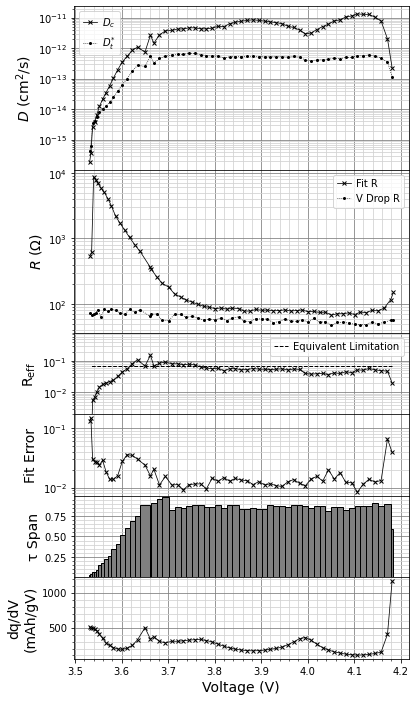

269 NM9505 30C Charge-2e
Working on cell: 269 NM9505 30C
Positive electrode active mass: 0.002367 g
Input cell capacity: 0.000533 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.534 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.534 V - 3.534 V', '3.534 V - 3.534 V', '3.534 V - 3.538 V', '3.538 V - 3.553 V', '3.553 V - 3.564 V', '3.564 V - 3.577 V', '3.577 V - 3.590 V', '3.590 V - 3.603 V', '3.603 V - 3.615 V', '3.615 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.669 V', '3.669 V - 3.679 V', '3.679 V - 3.689 V', '3.689 V - 3.699 V', '3.699 V - 3.709 V', '3.709 V - 3.722 V', '3.722 V - 3.735 V', '3.735 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 

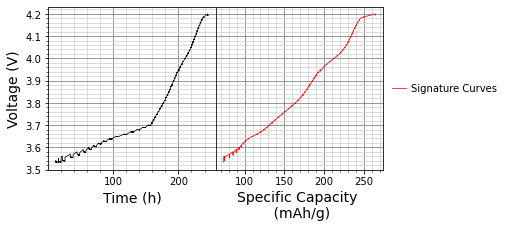

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\269\269 NM9505 30C Charge-2e\269 NM9505 30C Charge-2e Parsed.jpg


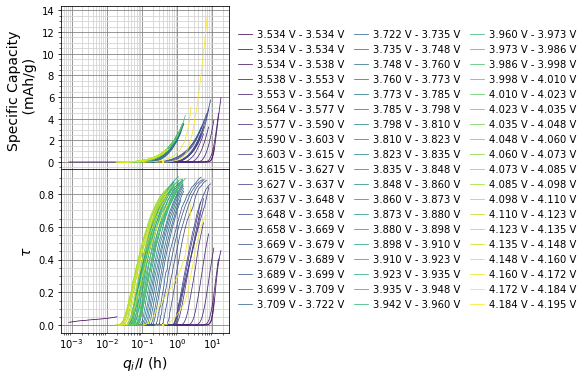

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.534 V - 3.534 V: No fit within Reff bounds
3.534 V - 3.534 V: No fit within Reff bounds
3.534 V - 3.538 V: [-13.029  -0.848  12.181]
3.538 V - 3.553 V: [-12.586  -0.353  12.233]
3.553 V - 3.564 V: [-12.932  -0.803  12.129]
3.564 V - 3.577 V: [-12.89   -1.016  11.874]
3.577 V - 3.590 V: [-12.651  -1.001  11.65 ]
3.590 V - 3.603 V: [-12.44   -1.003  11.437]
3.603 V - 3.615 V: [-12.304  -1.07   11.233]
3.615 V - 3.627 V: [-12.239  -1.072  11.167]
3.627 V - 3.637 V: [-12.35   -1.208  11.142]
3.637 V - 3.648 V: [-12.314  -1.109  11.206]
3.648 V - 3.658 V: [-12.077  -0.89   11.188]
3.658 V - 3.669 V: [-11.761  -0.761  11.   ]
3.669 V - 3.679 V: [-11.652  -0.79   10.862]
3.679 V - 3.689 V: [-11.577  -0.819  10.758]
3.689 V - 3.699 V: [-11.508  -0.827  10.681]
3.699 V - 3.709 V: [-11.429  -0.842  10.587]
3.709 V - 3.722 V: [-11.427  -0.897  10.529]
3.722 V - 3.735 V: [-11.392  -0.927  10.465]
3.735 V - 3.748 V: [-11.343  -0.929  10.414]
3.74

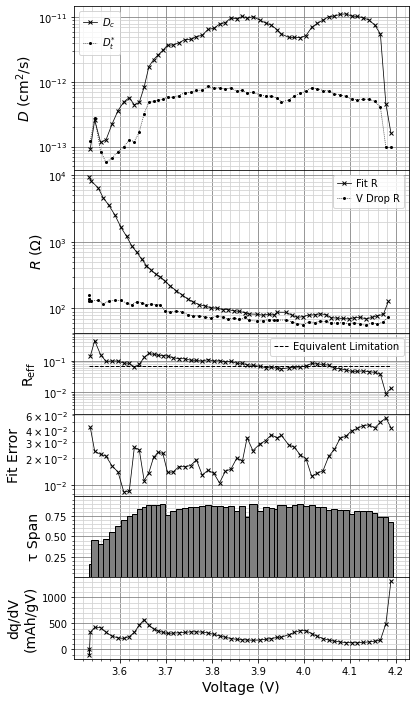

270 NM9505 30C Discharge-2e
Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.000485 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 177
Starting voltage: 4.184 V
Ending voltage: 3.455 V
Found 59 charge or discharge steps in signature curve sequences.
Found 59 signature curves.
Voltage interval labels: ['4.184 V - 4.178 V', '4.178 V - 4.164 V', '4.164 V - 4.151 V', '4.151 V - 4.138 V', '4.138 V - 4.126 V', '4.126 V - 4.113 V', '4.113 V - 4.101 V', '4.101 V - 4.088 V', '4.088 V - 4.076 V', '4.076 V - 4.063 V', '4.063 V - 4.051 V', '4.051 V - 4.038 V', '4.038 V - 4.026 V', '4.026 V - 4.013 V', '4.013 V - 4.001 V', '4.001 V - 3.988 V', '3.988 V - 3.976 V', '3.976 V - 3.963 V', '3.963 V - 3.951 V', '3.951 V - 3.938 V', '3.938 V - 3.926 V', '3.926 V - 3.913 V', '3.913 V - 3.901 V', '3.901 V - 3.888 V', '3.888 V

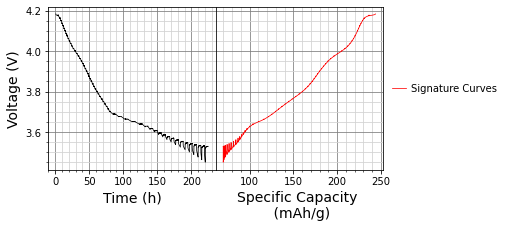

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Discharge-2e\270 NM9505 30C Discharge-2e Parsed.jpg


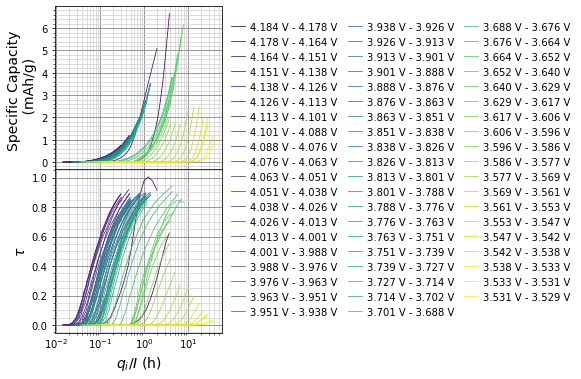

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
4.184 V - 4.178 V: [-12.627  -1.683  10.943]
4.178 V - 4.164 V: [-11.66   -1.308  10.352]
4.164 V - 4.151 V: [-11.068  -1.29    9.778]
4.151 V - 4.138 V: [-10.957  -1.236   9.722]
4.138 V - 4.126 V: [-10.837  -1.17    9.668]
4.126 V - 4.113 V: [-10.825  -1.212   9.613]
4.113 V - 4.101 V: [-10.849  -1.262   9.587]
4.101 V - 4.088 V: [-10.875  -1.282   9.593]
4.088 V - 4.076 V: [-10.912  -1.289   9.622]
4.076 V - 4.063 V: [-11.003  -1.342   9.661]
4.063 V - 4.051 V: [-11.029  -1.281   9.747]
4.051 V - 4.038 V: [-11.149  -1.334   9.816]
4.038 V - 4.026 V: [-11.24   -1.373   9.866]
4.026 V - 4.013 V: [-11.335  -1.362   9.974]
4.013 V - 4.001 V: [-11.433  -1.362  10.072]
4.001 V - 3.988 V: [-11.445  -1.319  10.127]
3.988 V - 3.976 V: [-11.353  -1.23   10.123]
3.976 V - 3.963 V: [-11.241  -1.188  10.053]
3.963 V - 3.951 V: [-11.204  -1.228   9.976]
3.951 V - 3.938 V: [-11.129  -1.197   9.932]
3.938 V - 3.926 V: [-11.113  -1.218   9.894]
3.92

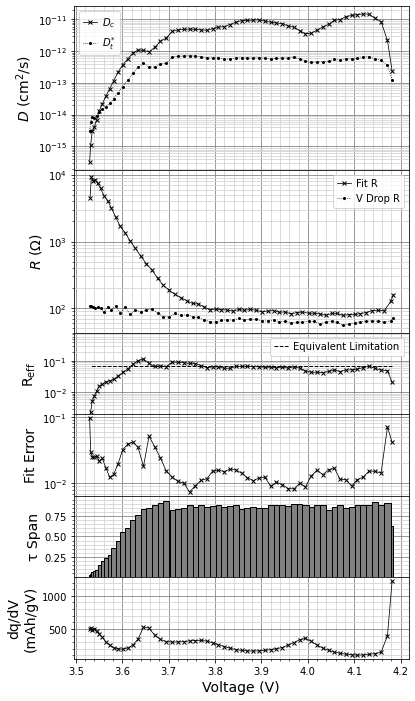

270 NM9505 30C Charge-2e
Working on cell: 270 NM9505 30C
Positive electrode active mass: 0.002157 g
Input cell capacity: 0.000485 Ah
3-electrode data detected. Ignoring working potential and using complete cell potential for everything. [NOT RECCOMMENDED]
First signature curve step: 1
Last signature curve step: 171
Starting voltage: 3.532 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.532 V - 3.532 V', '3.532 V - 3.532 V', '3.532 V - 3.538 V', '3.538 V - 3.552 V', '3.552 V - 3.563 V', '3.563 V - 3.576 V', '3.576 V - 3.589 V', '3.589 V - 3.602 V', '3.602 V - 3.615 V', '3.615 V - 3.626 V', '3.626 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.668 V', '3.668 V - 3.678 V', '3.678 V - 3.688 V', '3.688 V - 3.699 V', '3.698 V - 3.709 V', '3.709 V - 3.722 V', '3.722 V - 3.734 V', '3.734 V - 3.748 V', '3.748 V - 3.760 V', '3.760 V - 3.773 V', '3.773 V - 3.785 V', '3.785 V - 

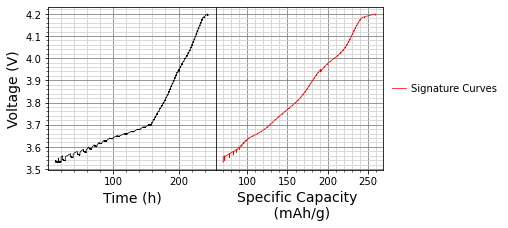

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\270\270 NM9505 30C Charge-2e\270 NM9505 30C Charge-2e Parsed.jpg


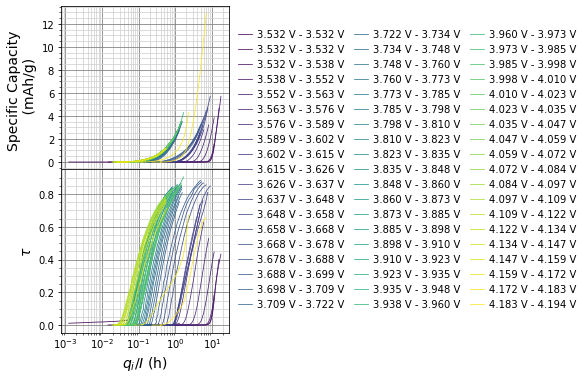

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.532 V - 3.532 V: No fit within Reff bounds
3.532 V - 3.532 V: No fit within Reff bounds
3.532 V - 3.538 V: [-12.823  -0.613  12.211]
3.538 V - 3.552 V: [-12.71   -0.481  12.229]
3.552 V - 3.563 V: [-12.928  -0.763  12.165]
3.563 V - 3.576 V: [-12.933  -1.02   11.912]
3.576 V - 3.589 V: [-12.702  -1.004  11.697]
3.589 V - 3.602 V: [-12.45   -0.968  11.482]
3.602 V - 3.615 V: [-12.326  -1.053  11.273]
3.615 V - 3.626 V: [-12.26   -1.056  11.205]
3.626 V - 3.637 V: [-12.349  -1.158  11.191]
3.637 V - 3.648 V: [-12.358  -1.125  11.233]
3.648 V - 3.658 V: [-12.112  -0.87   11.243]
3.658 V - 3.668 V: [-11.846  -0.808  11.038]
3.668 V - 3.678 V: [-11.722  -0.792  10.93 ]
3.678 V - 3.688 V: [-11.651  -0.838  10.813]
3.688 V - 3.699 V: [-11.611  -0.889  10.722]
3.698 V - 3.709 V: [-11.464  -0.851  10.613]
3.709 V - 3.722 V: [-11.433  -0.877  10.556]
3.722 V - 3.734 V: [-11.416  -0.923  10.494]
3.734 V - 3.748 V: [-11.393  -0.962  10.431]
3.74

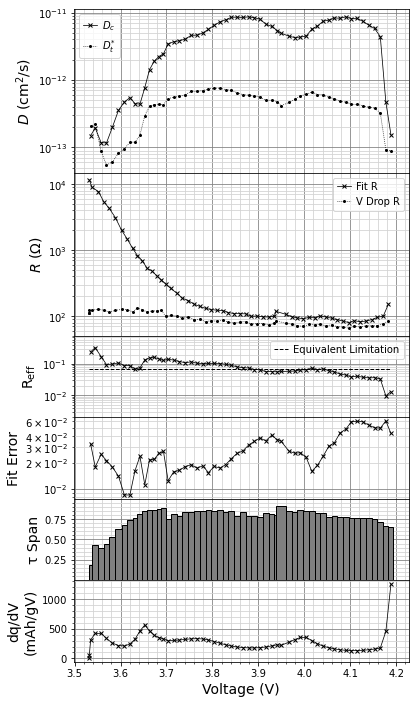

Found discharge data for cell 215
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\215 NM9505 30C Old Discharge Filtered.xlsx
Found charge data for cell 215
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\215 NM9505 30C Old Charge Filtered.xlsx
Found discharge data for cell 217
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\217 NM9505 30C Old Discharge Filtered.xlsx
Found charge data for cell 217
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\217 NM9505 30C Old Charge Filtered.xlsx
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\NM9505 30C Old Individual Cells.jpg


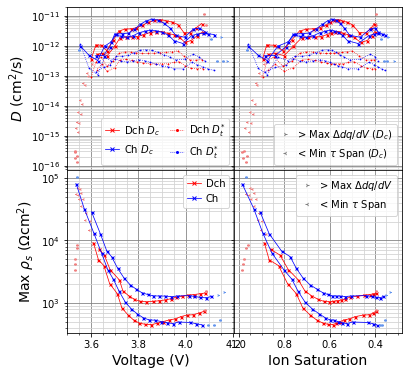

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\NM9505 30C Old Ch vs Dch.jpg


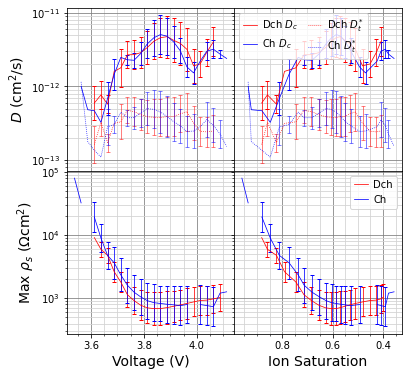

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\NM9505 30C Old All.jpg


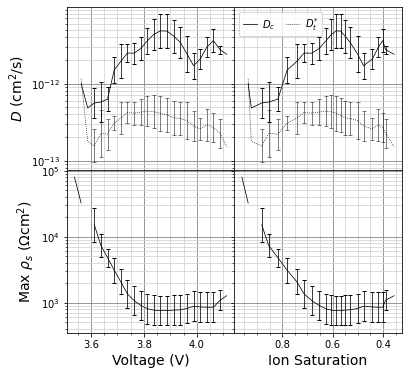

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C Old\NM9505 30C Old (215, 217).xlsx
Found discharge data for cell 243
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\243 NMC640 30C Discharge Filtered.xlsx
Found charge data for cell 243
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\243 NMC640 30C Charge Filtered.xlsx
Found discharge data for cell 246
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\246 NMC640 30C Discharge Filtered.xlsx
Found charge data for cell 246
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\246 NMC640 30C Charge Filtered.xlsx
Found discharge data for cell 259
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\259 NMC640 30C Discharge Filtered.xlsx
Found charge data for cell 259
Filtered data exporting to:
C:\Users\Mitch\Lab\At

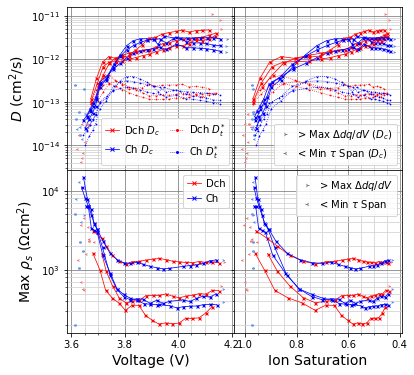

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\NMC640 30C Ch vs Dch.jpg


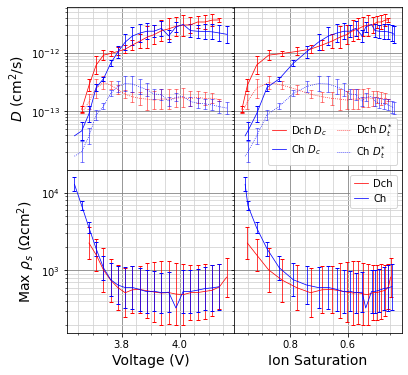

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\NMC640 30C All.jpg


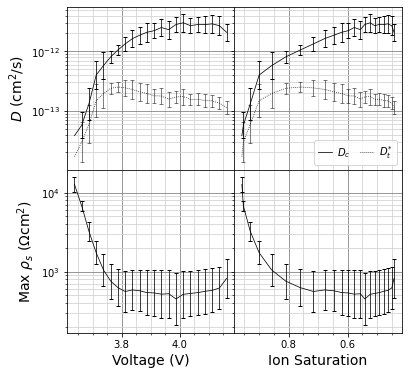

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC640 30C\NMC640 30C (243, 246, 259).xlsx
Found discharge data for cell 239
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\239 NMC811 30C Discharge Filtered.xlsx
Found charge data for cell 239
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\239 NMC811 30C Charge Filtered.xlsx
Found discharge data for cell 272
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\272 NMC811 30C Discharge Filtered.xlsx
Found charge data for cell 272
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\272 NMC811 30C Charge Filtered.xlsx
Found discharge data for cell 276
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\276 NMC811 30C Discharge Filtered.xlsx
Found charge data for cell 276
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlun

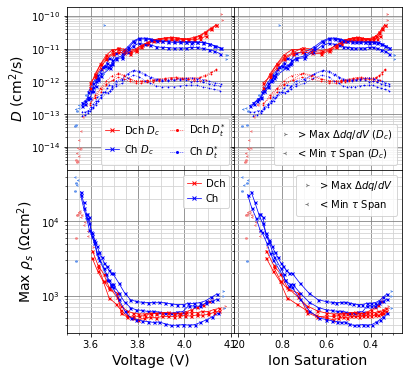

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\NMC811 30C Ch vs Dch.jpg


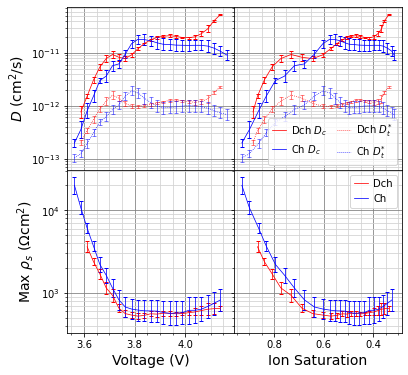

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\NMC811 30C All.jpg


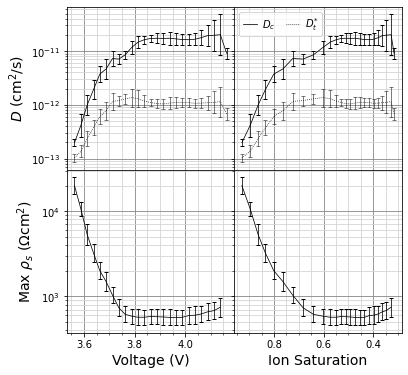

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NMC811 30C\NMC811 30C (239, 272, 276).xlsx
Found discharge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\266 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\266 NM9505 30C Charge Filtered.xlsx
Found discharge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\269 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\269 NM9505 30C Charge Filtered.xlsx
Found discharge data for cell 270
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\270 NM9505 30C Discharge Filtered.xlsx
Found charge data for cell 270
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlun

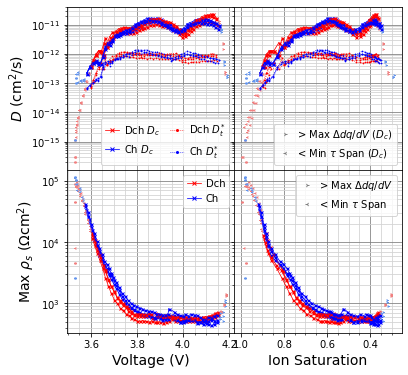

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C Ch vs Dch.jpg


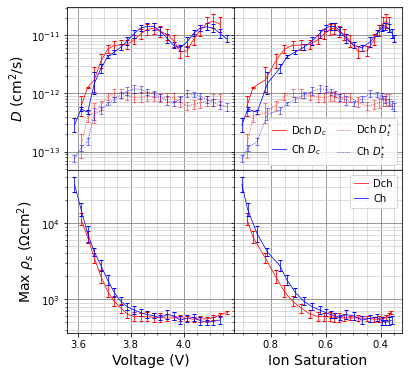

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C All.jpg


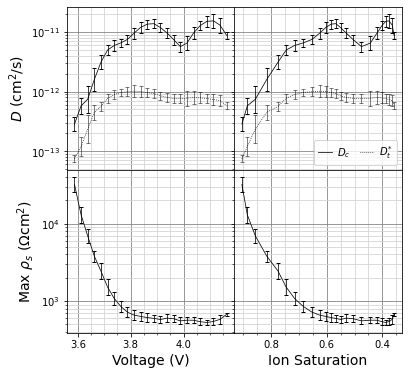

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C\NM9505 30C (266, 269, 270).xlsx
Found discharge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\266 NM9505 30C Discharge-2e Filtered.xlsx
Found charge data for cell 266
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\266 NM9505 30C Charge-2e Filtered.xlsx
Found discharge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\269 NM9505 30C Discharge-2e Filtered.xlsx
Found charge data for cell 269
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\269 NM9505 30C Charge-2e Filtered.xlsx
Found discharge data for cell 270
Filtered data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\270 NM9505 30C Discharge-2e Filtered.xlsx
Found charge data for cell 270
Filtered data exportin

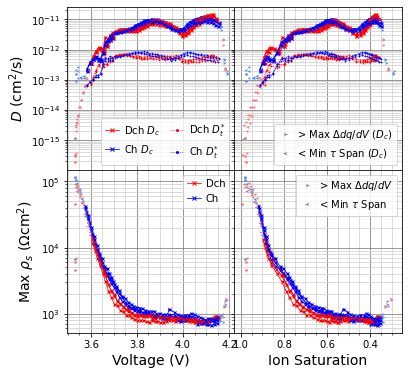

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\NM9505 30C-2e Ch vs Dch.jpg


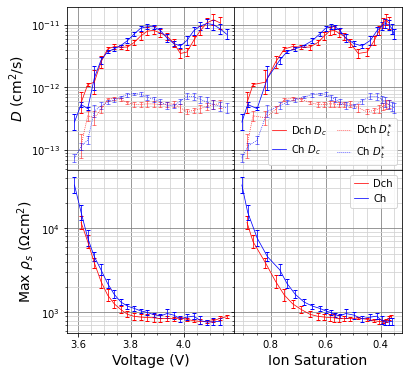

C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\NM9505 30C-2e All.jpg


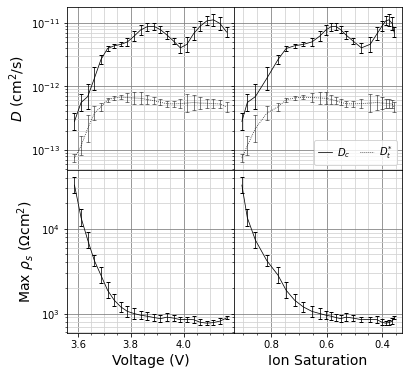

Bin averaged data exporting to:
C:\Users\Mitch\Lab\Atlung Modeling\BioLogic Data\NM9505 30C-2e\NM9505 30C-2e (266, 269, 270).xlsx


In [1]:
radius9 = 1.318e-4 #NM9505
radius6 = 0.784e-4 #NMC640
radius8 = 1.736e-4 #NMC811
ionsat_inputs9 = [303.15, 275, 3.7, 66, 4.0, 149] #NM9505
ionsat_inputs6 = [303.15, 279, 3.8, 74, 4.1, 148] #NMC640
ionsat_inputs8 = [303.15, 275.5, 3.7, 70, 4.1, 178] #NMC811

from amidr import BIOCONVERT
from amidr import AMIDR
from amidr import BINAVERAGE

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/215'
formfiles = ['215_230224_C01.mpt', '215_230301_D_C01.mpt']
dfiles = ['215_230316_D4,2-3,7V_C01.mpt', '215_230320_D3,7-3,45V_C01.mpt']
cfiles = ['215_230324_C3,45-3,7V_C01.mpt', '215_230331_C3,7-4,2V_C01.mpt']
cellname = '215 NM9505 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/217'
formfiles = ['217_230224_C03.mpt', '217_230227_C03.mpt', '217_230301_D_C03.mpt']
dfiles = ['217_230316_D4,2-3,7V_C03.mpt', '217_230320_D3,7-3,45V_C03.mpt']
cfiles = ['217_230324_C3,45-3,7V_C03.mpt', '217_230331_C3,7-4,2V_C03.mpt']
cellname = '217 NM9505 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/243'
formfiles = ['243_230502_C06.mpt']
dfiles = ['243_230504_D4,2-3,7V_C06.mpt', '243_230507_D3,7-3,2V_C06.mpt']
cfiles = ['243_230509_C3,5-3,7V_C06.mpt', '243_230512_C3,7-4,2V_C06.mpt']
cellname = '243 NMC640 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/246'
formfiles = ['246_230502_C08.mpt']
dfiles = ['246_230504_D4,2-3,7V_C08.mpt', '246_230507_D3,7-3,2V_C08.mpt']
cfiles = ['246_230509_C3,5-3,7V_C08.mpt', '246_230512_C3,7-4,2V_C08.mpt']
cellname = '246 NMC640 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/259'
formfiles = ['259_230525_C09.mpt']
dfiles = ['259_230529_D4,2-3,7V_C09.mpt', '259_230531_D3,7-3,2V_C09.mpt']
cfiles = ['259_230601_C3,5-3,7V_C09.mpt', '259_230604_C3,7-4,2V_C09.mpt']
cellname = '259 NMC640 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/239'
formfiles = ['239_230502_C05.mpt']
dfiles = ['239_230504_D4,2-3,7V_C05.mpt', '239_230507_D3,7-3,2V_C05.mpt']
cfiles = ['239_230509_C3,5-3,7V_C05.mpt', '239_230515_C3,7-4,2V_C05.mpt']
cellname = '239 NMC811 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/272'
formfiles = ['272_230607_C06.mpt']
dfiles = ['272_230609_D4,2-3,7V_C06.mpt', '272_230612_D3,7-3,2V_C06.mpt']
cfiles = ['272_230615_C3,5-3,7V_C06.mpt', '272_230623_C3,7-4,2V_C06.mpt']
cellname = '272 NMC811 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/276'
formfiles = ['276_230607_C11.mpt']
dfiles = ['276_230609_D4,2-3,7V_C11.mpt', '276_230612_D3,7-3,2V_C11.mpt']
cfiles = ['276_230615_C3,5-3,7V_C11.mpt', '276_230623_C3,7-4,2V_C11.mpt']
cellname = '276 NMC811 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/266'
formfiles = ['266_230530_C08.mpt']
dfiles = ['266_230602_D4,2-3,95V_C08.mpt', '266_230604_D3,95-3,7V_C08.mpt', '266_230606_D3,7-3,45V_C08.mpt']
cfiles = ['266_230612_C3,5-3,7V_C08.mpt', '266_230619_C3,7-3,95V_C08.mpt', '266_230623_C3,95-4,2V_C08.mpt']
cellname = '266 NM9505 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269'
formfiles = ['269_230530_C12.mpt']
dfiles = ['269_230602_D4,2-3,95V_C12.mpt', '269_230604_D3,95-3,7V_C12.mpt', '269_230606_D3,7-3,45V_C12.mpt']
cfiles = ['269_230612_C3,5-3,7V_C12.mpt', '269_230619_C3,7-3,95V_C12.mpt', '269_230623_C3,95-4,2V_C12.mpt']
cellname = '269 NM9505 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/270'
formfiles = ['270_230530_C02.mpt']
dfiles = ['270_230602_D4,2-3,95V_C02.mpt', '270_230604_D3,95-3,7V_C02.mpt', '270_230606_D3,7-3,45V_C02.mpt']
cfiles = ['270_230612_C3,5-3,7V_C02.mpt', '270_230619_C3,7-3,95V_C02.mpt', '270_230623_C3,95-4,2V_C02.mpt']
cellname = '270 NM9505 30C'
BIOCONVERT(cellpath, formfiles, dfiles, cfiles, cellname)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/215'
uhpc_file = '215 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '215 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/217'
uhpc_file = '217 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '217 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/243'
uhpc_file = '243 NMC640 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '243 NMC640 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/246'
uhpc_file = '246 NMC640 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '246 NMC640 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/259'
uhpc_file = '259 NMC640 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '259 NMC640 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius6, R_corr=True, ionsat_inputs = ionsat_inputs6)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/239'
uhpc_file = '239 NMC811 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '239 NMC811 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/272'
uhpc_file = '272 NMC811 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '272 NMC811 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/276'
uhpc_file = '276 NMC811 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '276 NMC811 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius8, R_corr=True, ionsat_inputs = ionsat_inputs8)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/266'
uhpc_file = '266 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '266 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269'
uhpc_file = '269 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '269 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/270'
uhpc_file = '270 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '270 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True)
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/266'
uhpc_file = '266 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '266 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269'
uhpc_file = '269 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '269 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

cellpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/270'
uhpc_file = '270 NM9505 30C Discharge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)
uhpc_file = '270 NM9505 30C Charge.csv'
amidr_data = AMIDR(cellpath, uhpc_file, single_pulse=True, force2e = True, parselabel = '2e')
amidr_data.plot_protocol()
amidr_data.plot_caps() 
fit_data = amidr_data.fit_atlung(radius9, R_corr=True, ionsat_inputs = ionsat_inputs9)
amidr_data.make_summary_graph(fit_data=fit_data)

path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'

cells = ['215', '217']
matname = 'NM9505 30C Old'
BINAVERAGE(path, cells, matname, binsize = 0.025)

cells = ['243', '246', '259']
matname = 'NMC640 30C'
BINAVERAGE(path, cells, matname, binsize = 0.025)

cells = ['239', '272', '276']
matname = 'NMC811 30C'
BINAVERAGE(path, cells, matname, binsize = 0.025)

cells = ['266', '269', '270']
matname = 'NM9505 30C'
BINAVERAGE(path, cells, matname, binsize = 0.025)

cells = ['266', '269', '270']
matname = 'NM9505 30C'
BINAVERAGE(path, cells, matname, binsize = 0.025, parselabel = '2e')